# Group Project
This project is a part of BUSA8000 - Technique in Business Analytics, Session 2, 2024.

Group Members:
| Name | ID |
|------|----|
|Chayut Deekongsieng | 46800883|
|Phattharalapha Seedadee | 48631736|
|Sakol Anantwatanapong | 48592307|
 Thana Kumpunya |48194085|


## Initial Data Loading and Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.float_format', '{:.4f}'.format)

- Loaded two CSV files for 2012 and 2013 using pandas
- Handled encoding with 'ISO-8859-1' to prevent character issues

In [3]:
s_2012 = pd.read_csv('2012_Data.csv', encoding='ISO-8859-1')
s_2012.info()

C:\Users\reo_c\AppData\Local\Temp\ipykernel_27872\1851975636.py:1: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  s_2012 = pd.read_csv('2012_Data.csv', encoding='ISO-8859-1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037205 entries, 0 to 1037204
Data columns (total 41 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   accounting_date           1037205 non-null  int64  
 1   fiscal_year               1037205 non-null  int64  
 2   fiscal_month              1037205 non-null  int64  
 3   calendar_year             1037205 non-null  int64  
 4   calendar_month            1037205 non-null  int64  
 5   calendar_day              1037205 non-null  int64  
 6   company_code              1037205 non-null  int64  
 7   customer_code             1037205 non-null  object 
 8   customer_district_code    1037205 non-null  int64  
 9   item_code                 1037205 non-null  object 
 10  business_area_code        1037205 non-null  object 
 11  item_group_code           1037205 non-null  object 
 12  item_class_code           1037205 non-null  object 
 13  item_type                 1

In [4]:
s_2013 = pd.read_csv('2013_Data.csv', encoding='ISO-8859-1')
s_2013.info()

C:\Users\reo_c\AppData\Local\Temp\ipykernel_27872\2166878608.py:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  s_2013 = pd.read_csv('2013_Data.csv', encoding='ISO-8859-1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951177 entries, 0 to 951176
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accounting_date           951177 non-null  int64  
 1   fiscal_year               951177 non-null  int64  
 2   fiscal_month              951177 non-null  int64  
 3   calendar_year             951177 non-null  int64  
 4   calendar_month            951177 non-null  int64  
 5   calendar_day              951177 non-null  int64  
 6   company_code              951177 non-null  int64  
 7   customer_code             951177 non-null  object 
 8   customer_district_code    951177 non-null  int64  
 9   item_code                 951177 non-null  object 
 10  business_area_code        951177 non-null  object 
 11  item_group_code           951177 non-null  object 
 12  item_class_code           951177 non-null  object 
 13  item_type                 951177 non-null  i

Inspect the column consistency between 2012 and 2013 datasets


In [5]:
# Compare data types between s_2012 and s_2013
print("Comparing data types between s_2012 and s_2013:")
print("\nColumns with different data types:")
for col in s_2012.columns:
    if s_2012[col].dtype != s_2013[col].dtype:
        print(f"\n{col}:")
        print(f"s_2012 dtype: {s_2012[col].dtype}")
        print(f"s_2013 dtype: {s_2013[col].dtype}")


Comparing data types between s_2012 and s_2013:

Columns with different data types:

customer_order_number:
s_2012 dtype: int64
s_2013 dtype: object


In [6]:
s_2012['customer_order_number'] = s_2012['customer_order_number'].astype(str)
s_2012.shape

(1037205, 41)

In [7]:
# Check if columns match exactly
columns_match = set(s_2012.columns) == set(s_2013.columns)
print("\nThe columns of two dataframes match exactly:", columns_match)

# Find any differences in columns if they exist
if not columns_match:
    print("\nColumns unique to s_2012:", set(s_2012.columns) - set(s_2013.columns))
    print("Columns unique to s_2013:", set(s_2013.columns) - set(s_2012.columns))



The columns of two dataframes match exactly: True


Combined datasets using pd.concat() resulting in 1,988,382 rows and 41 columns

In [8]:
combined = pd.concat([s_2012, s_2013], ignore_index=True)

In [9]:
combined.shape

(1988382, 41)

In [10]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988382 entries, 0 to 1988381
Data columns (total 41 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   accounting_date           int64  
 1   fiscal_year               int64  
 2   fiscal_month              int64  
 3   calendar_year             int64  
 4   calendar_month            int64  
 5   calendar_day              int64  
 6   company_code              int64  
 7   customer_code             object 
 8   customer_district_code    int64  
 9   item_code                 object 
 10  business_area_code        object 
 11  item_group_code           object 
 12  item_class_code           object 
 13  item_type                 int64  
 14  bonus_group_code          object 
 15  environment_group_code    object 
 16  technology_group_code     object 
 17  commission_group_code     object 
 18  reporting_classification  object 
 19  light_source              object 
 20  warehouse_code          

## Section 1: Clean the Dataset

### Missing Values Treatment

Conducted comprehensive null check across all columns

In [11]:
combined.isnull().sum()

accounting_date                   0
fiscal_year                       0
fiscal_month                      0
calendar_year                     0
calendar_month                    0
calendar_day                      0
company_code                      0
customer_code                     0
customer_district_code            0
item_code                         0
business_area_code                0
item_group_code                   0
item_class_code                   0
item_type                         0
bonus_group_code                  0
environment_group_code            0
technology_group_code             0
commission_group_code             0
reporting_classification          0
light_source                      0
warehouse_code                    0
abc_class_code                    0
abc_class_volume                  0
business_chain_l1_code            0
business_chain_l1_name            0
contact_method_code               0
salesperson_code                  0
order_type_code             

Identified and dropped 'item_source_class' column (contained only NaN values)

In [12]:
# Investigate on 'item_source_class'
item_source_col = combined['item_source_class'].unique()
item_source_col

array([nan])

In [13]:
# drop 'item_source_class' column
combined = combined.drop('item_source_class', axis=1)

### Data Type Conversions

Converted categorical columns to string type

In [14]:
# Convert categorical column to string type
date_cols = ['company_code','customer_district_code','item_type','item_code','invoice_number','line_number']
combined[date_cols] = combined[date_cols].astype(str)

Converted all of datetime columns ('accounting_date', 'invoice_date', 'order_date') to pd datetime format

In [15]:
#check date format

date_cols = ['accounting_date', 'invoice_date', 'order_date']
combined[date_cols].head(5)

,accounting_date,invoice_date,order_date
0,20120509,20120509,20120509
1,20120216,20120216,20120216
2,20120509,20120509,20120508
3,20120518,20120518,20120518
4,20120109,20120109,20120109


In [16]:
# Convert to string first
combined[date_cols] = combined[date_cols].astype(int).astype(str)

# Convert each date column to datetime format
for col in date_cols:
    combined[col] = pd.to_datetime(combined[col], format='%Y%m%d', errors='coerce')
# check if transformation is successful
combined[date_cols].head(5)

,accounting_date,invoice_date,order_date
0,2012-05-09,2012-05-09,2012-05-09
1,2012-02-16,2012-02-16,2012-02-16
2,2012-05-09,2012-05-09,2012-05-08
3,2012-05-18,2012-05-18,2012-05-18
4,2012-01-09,2012-01-09,2012-01-09


In [17]:
combined.describe()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,value_sales,value_cost,value_quantity,value_price_adjustment,invoice_date,order_date
count,1988382,1988382.0000,1988382.0000,1988382.0000,1988382.0000,1988382.0000,1988382.0000,1988382.0000,1988382.0000,1988382.0000,1988382,1988382
mean,2012-12-19 08:25:48.122643712,2012.9679,6.5248,2012.4784,6.3989,15.4622,409.8476,263.8138,27.1802,0.0244,2012-12-19 08:25:48.122643712,2012-12-15 16:19:19.266981120
min,2012-01-02 00:00:00,2012.0000,1.0000,2012.0000,1.0000,1.0000,-793541.9800,-141469.5200,-45000.0000,0.0000,2012-01-02 00:00:00,2009-03-26 00:00:00
25%,2012-06-19 00:00:00,2012.0000,3.0000,2012.0000,4.0000,8.0000,23.0000,9.3810,2.0000,0.0000,2012-06-19 00:00:00,2012-06-15 00:00:00
50%,2012-12-06 00:00:00,2013.0000,7.0000,2012.0000,6.0000,15.0000,67.5000,31.0700,6.0000,0.0000,2012-12-06 00:00:00,2012-12-04 00:00:00
75%,2013-06-20 00:00:00,2013.0000,10.0000,2013.0000,9.0000,23.0000,197.7000,101.9106,20.0000,0.0000,2013-06-20 00:00:00,2013-06-18 00:00:00
max,2013-12-31 00:00:00,2014.0000,12.0000,2013.0000,12.0000,31.0000,793541.9800,777669.2000,105000.0000,1.0000,2013-12-31 00:00:00,2013-12-30 00:00:00
std,NaN,0.7120,3.6209,0.4995,3.2515,8.6849,2935.1795,2050.5140,329.4667,0.1543,NaN,NaN


Added new 'year_month' column in 'yyyy-mm' format for being used in later analysis

In [18]:
combined['year_month'] = combined['accounting_date'].dt.strftime('%Y-%m')

In [19]:
combined.head()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,value_quantity,value_price_adjustment,currency,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time,year_month
0,2012-05-09,2012,11,2012,5,9,101,411800601,410,GENIE8WWWBC,...,84.0000,0,AUD,2217887,1,2012-05-09,2865354,2012-05-09,49:58.7,2012-05
1,2012-02-16,2012,8,2012,2,16,101,361000403,300,GENIE8WWWBC,...,12.0000,0,AUD,2185745,1,2012-02-16,2833515,2012-02-16,49:58.7,2012-02
2,2012-05-09,2012,11,2012,5,9,101,361000403,300,GENIE8WWWBC,...,12.0000,0,AUD,2217807,1,2012-05-09,2864857,2012-05-08,49:58.7,2012-05
3,2012-05-18,2012,11,2012,5,18,101,565540415,500,GENIE8WWWBC,...,6.0000,0,AUD,2222758,1,2012-05-18,2869759,2012-05-18,49:58.7,2012-05
4,2012-01-09,2012,7,2012,1,9,101,565540415,500,GENIE8WWWBC,...,6.0000,0,AUD,2170374,1,2012-01-09,2819189,2012-01-09,49:58.7,2012-01


### Handle Categorical Attributes

Checking the unique values of each attribute

In [20]:
# Select categorical columns (string/object columns)
cat_cols = combined.select_dtypes(include=['object']).columns

In [21]:
# Count no. of unique values
for col in cat_cols:
    print(f'{col} unique values:', combined[col].nunique())

company_code unique values: 10
customer_code unique values: 7241
customer_district_code unique values: 17
item_code unique values: 34472
business_area_code unique values: 28
item_group_code unique values: 614
item_class_code unique values: 204
item_type unique values: 9
bonus_group_code unique values: 2
environment_group_code unique values: 9
technology_group_code unique values: 103
commission_group_code unique values: 3
reporting_classification unique values: 2
light_source unique values: 3
warehouse_code unique values: 59
abc_class_code unique values: 10
abc_class_volume unique values: 10
business_chain_l1_code unique values: 48
business_chain_l1_name unique values: 43
contact_method_code unique values: 1665
salesperson_code unique values: 271
order_type_code unique values: 37
market_segment unique values: 1
currency unique values: 6
invoice_number unique values: 619292
line_number unique values: 142
customer_order_number unique values: 661310
dss_update_time unique values: 1
year_mo

In [22]:
# Display the attributes that has less than 50 uniques values
for col in cat_cols:
    unique_values = combined[col].unique()
    
    # Print only if the column has less than 10 unique values
    if len(unique_values) < 50:
        print(f'{col} unique values ({len(unique_values)}): {unique_values}')
        print()

company_code unique values (10): ['101' '100' '140' '205' '170' '220' '950' '240' '510' '120']

customer_district_code unique values (17): ['410' '300' '500' '310' '400' '200' '210' '720' '710' '600' '510' '530'
 '535' '540' '520' '545' '100']

business_area_code unique values (28): ['LMP                           ' 'FLD                           '
 'OTH                           ' 'SUR                           '
 'COM                           ' 'DLT                           '
 'TRO                           ' 'URB                           '
 'HLB                           ' 'SAE                           '
 'RWY                           ' 'LCP                           '
 'PEN                           ' 'EXL                           '
 'TAL                           ' '945' '950' '980' '920' '960' '910'
 '930' '999' '970' '940' '985' 'IAE                           '
 'IAI                           ']

item_type unique values (9): ['5' '1' '7' '8' '6' '4' '2' '9' '3']

bonus_gro

There are many elements that have spaces containing in the attribute, so we're going to remove them.

In [23]:
# Remove all elements are strings and then strip leading and trailing spaces
combined[cat_cols] = combined[cat_cols].apply(lambda x: x.astype(str).str.strip())

In [24]:
# Display the attributes that has less than 50 uniques values
for col in cat_cols:
    unique_values = combined[col].unique()
    
    # Print only if the column has less than 10 unique values
    if len(unique_values) < 50:
        print(f'{col} unique values ({len(unique_values)}): {unique_values}')
        print()

company_code unique values (10): ['101' '100' '140' '205' '170' '220' '950' '240' '510' '120']

customer_district_code unique values (17): ['410' '300' '500' '310' '400' '200' '210' '720' '710' '600' '510' '530'
 '535' '540' '520' '545' '100']

business_area_code unique values (28): ['LMP' 'FLD' 'OTH' 'SUR' 'COM' 'DLT' 'TRO' 'URB' 'HLB' 'SAE' 'RWY' 'LCP'
 'PEN' 'EXL' 'TAL' '945' '950' '980' '920' '960' '910' '930' '999' '970'
 '940' '985' 'IAE' 'IAI']

item_type unique values (9): ['5' '1' '7' '8' '6' '4' '2' '9' '3']

bonus_group_code unique values (2): ['Trade' 'Professional']

environment_group_code unique values (9): ['S' 'P' 'D' 'Z' 'C' 'M' 'R' 'I' 'NA']

commission_group_code unique values (3): ['NET_SALES' 'REBATE_EXEMPT_EOL' 'REBATE_EXEMPT_TP']

reporting_classification unique values (2): ['Discontinuing' 'Continuing']

light_source unique values (3): ['Traditional' 'LED' 'Accessories']

abc_class_code unique values (10): ['J' 'B' 'D' 'E' 'C' 'I' 'A' 'F' 'U' 'G']

abc_class_vol

####  Business Area Code Standardization

- Combined similar business codes under unified names
- Created new 'business_area_name' column for better readability
- Maintained original codes while providing standardized descriptions

In [25]:
# Create new column with the distince name of business_area_code

# Define a dictionary to map combined codes to their names
combine_dict = {
    'LMP': 'Lamps', '970': 'Lamps',
    'OTH': 'Other', '999': 'Other',
    'FLD': 'Flood', '920': 'Flood',
    'RWY': 'Roadway', '930': 'Roadway',
    'EXL': 'Emergency', '960': 'Emergency',
    'TRO': 'Track & Linear Systems', 'TAL': 'Track & Linear Systems',
    'SUR': 'Surface',
    'COM': 'Components',
    'DLT': 'Downlight',
    'URB': 'Urban Amenity',
    'HLB': 'Highbay/Lowbay',
    'SAE': 'Stand Alone Emergency',
    'LCP': 'Lighting Control',
    'PEN': 'Pendant',
    '945': 'Architectural - Exterior',
    '950': 'Commercial',
    '980': 'Trade/Retail - Interior',
    '910': 'Industrial',
    '940': 'Architectural - Interior',
    '985': 'Trade/Retail - Exterior',
    'IAE': 'Inlite Architectural Exterior',
    'IAI': 'Inlite Architectural Interior'
}
combined['business_area_name'] = combined['business_area_code'].map(combine_dict)

In [26]:
combined[['business_area_name','business_area_code']].tail(10)

,business_area_name,business_area_code
1988372,Lamps,LMP
1988373,Surface,SUR
1988374,Surface,SUR
1988375,Surface,SUR
1988376,Surface,SUR
1988377,Surface,SUR
1988378,Track & Linear Systems,TRO
1988379,Other,OTH
1988380,Surface,SUR
1988381,Surface,SUR


#### 'Currency Standardization'
- Corrected 'AUS' to 'AUD'
- Filled empty values with 'AUD' as default

In [27]:
# replace inconsistent values in currency
curr_correction = {'AUS':'AUD','':'AUD'}
combined['currency'] = combined['currency'].replace(curr_correction)

combined['currency'].unique()

array(['AUD', 'USD', 'NZD', 'EUR'], dtype=object)

#### Order Type Code Cleanup

Exploring the values in the order_type_code attribute is crucial for sales analysis. According to the metadata, some order types are marked as "Do not use" without further clarification. Let’s investigate whether these values should be excluded from the analysis.

In [28]:
order_not_use = {'EDS', 'OBS', 'PPD', 'PM0', 'PGS', 'SPL', 'ZOP', 'ZC2', '5TN', 'PPO', 'ZD3', 'CSO'}

# Count the occurrences of undefined order types
do_not_use_order_count = combined['order_type_code'].isin(order_not_use).sum()
total_orders = combined.shape[0]

print(f"'Do Not Use' order_type_code count: {do_not_use_order_count}")
percentage_doNotUse = (do_not_use_order_count / total_orders) * 100
print(f"Percentage of total orders: {percentage_doNotUse:.2f}%")

'Do Not Use' order_type_code count: 14712
Percentage of total orders: 0.74%


Since these order types constitute only 0.74% of the total entries, dropping rows with these values would not significantly impact the overall data structure.

In [29]:
# Drop rows with 'Do not Use' order_type_code
# Drop rows with undefined order types
combined = combined[~combined['order_type_code'].isin(order_not_use)].reset_index(drop=True)

In [30]:
combined.shape

(1973670, 42)

### 1.1) Handle Numerical attributes

#### Currency Conversion Implementation
- The dataset contains transactions in multiple currencies (AUD, USD, NZD, EUR) across 2012-2013. To enable accurate analysis, all monetary values were standardized to AUD using historical exchange rates.

In [31]:
# Convert 'value_cost', and 'value_sales to AUD based on the currency used in each transaction. 

#https://www.exchangerates.org.uk/NZD-AUD-spot-exchange-rates-history-2013.html
#https://www.exchangerates.org.uk/EUR-AUD-spot-exchange-rates-history-2013.html

# Conversion rates
usd_to_aud = {2012: 1.04, 2013: 0.97}
nzd_to_aud = {2012: 0.78, 2013: 0.85}
eur_to_aud = {2012: 1.24, 2013: 1.38}

# Ensure columns are in float
combined['value_cost_aud'] = combined['value_cost'].astype(float)
combined['value_sales_aud'] = combined['value_sales'].astype(float)

# Apply conversion for USD based on year
combined.loc[(combined['currency'] == 'USD') & (combined['calendar_year'] == 2012), 'value_cost_aud'] = combined['value_cost'] * usd_to_aud[2012]
combined.loc[(combined['currency'] == 'USD') & (combined['calendar_year'] == 2013), 'value_cost_aud'] = combined['value_cost'] * usd_to_aud[2013]
combined.loc[(combined['currency'] == 'USD') & (combined['calendar_year'] == 2012), 'value_sales_aud'] = combined['value_sales'] * usd_to_aud[2012]
combined.loc[(combined['currency'] == 'USD') & (combined['calendar_year'] == 2013), 'value_sales_aud'] = combined['value_sales'] * usd_to_aud[2013]

# Apply conversion for NZD based on year
combined.loc[(combined['currency'] == 'NZD') & (combined['calendar_year'] == 2012), 'value_cost_aud'] = combined['value_cost'] * nzd_to_aud[2012]
combined.loc[(combined['currency'] == 'NZD') & (combined['calendar_year'] == 2013), 'value_cost_aud'] = combined['value_cost'] * nzd_to_aud[2013]
combined.loc[(combined['currency'] == 'NZD') & (combined['calendar_year'] == 2012), 'value_sales_aud'] = combined['value_sales'] * nzd_to_aud[2012]
combined.loc[(combined['currency'] == 'NZD') & (combined['calendar_year'] == 2013), 'value_sales_aud'] = combined['value_sales'] * nzd_to_aud[2013]


# Apply conversion for EUR based on year
combined.loc[(combined['currency'] == 'EUR') & (combined['calendar_year'] == 2012), 'value_cost_aud'] = combined['value_cost'] * nzd_to_aud[2012]
combined.loc[(combined['currency'] == 'EUR') & (combined['calendar_year'] == 2013), 'value_cost_aud'] = combined['value_cost'] * nzd_to_aud[2013]
combined.loc[(combined['currency'] == 'EUR') & (combined['calendar_year'] == 2012), 'value_sales_aud'] = combined['value_sales'] * nzd_to_aud[2012]
combined.loc[(combined['currency'] == 'EUR') & (combined['calendar_year'] == 2013), 'value_sales_aud'] = combined['value_sales'] * nzd_to_aud[2013]

In [32]:
# Drop the 'value_cost', 'value_sales' and 'currency' since thet are alredy defined it new conversions columns
combined = combined.drop(['value_cost', 'value_sales', 'currency'], axis=1)

#### Drop unnecessary attributes

In [33]:
combined = combined.drop(['line_number', 'dss_update_time'],axis=1)

In [34]:
combined.head()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,value_quantity,value_price_adjustment,invoice_number,invoice_date,customer_order_number,order_date,year_month,business_area_name,value_cost_aud,value_sales_aud
0,2012-05-09,2012,11,2012,5,9,101,411800601,410,GENIE8WWWBC,...,84.0000,0,2217887,2012-05-09,2865354,2012-05-09,2012-05,Lamps,178.1976,218.4000
1,2012-02-16,2012,8,2012,2,16,101,361000403,300,GENIE8WWWBC,...,12.0000,0,2185745,2012-02-16,2833515,2012-02-16,2012-02,Lamps,25.4568,38.2800
2,2012-05-09,2012,11,2012,5,9,101,361000403,300,GENIE8WWWBC,...,12.0000,0,2217807,2012-05-09,2864857,2012-05-08,2012-05,Lamps,25.4568,40.2000
3,2012-05-18,2012,11,2012,5,18,101,565540415,500,GENIE8WWWBC,...,6.0000,0,2222758,2012-05-18,2869759,2012-05-18,2012-05,Lamps,12.7284,20.1000
4,2012-01-09,2012,7,2012,1,9,101,565540415,500,GENIE8WWWBC,...,6.0000,0,2170374,2012-01-09,2819189,2012-01-09,2012-01,Lamps,12.7284,19.1400


In [35]:
combined.describe()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,value_quantity,value_price_adjustment,invoice_date,order_date,value_cost_aud,value_sales_aud
count,1973670,1973670.0000,1973670.0000,1973670.0000,1973670.0000,1973670.0000,1973670.0000,1973670.0000,1973670,1973670,1973670.0000,1973670.0000
mean,2012-12-19 07:35:59.671677184,2012.9678,6.5244,2012.4783,6.3990,15.4617,27.2222,0.0246,2012-12-19 07:35:59.671677184,2012-12-15 15:43:52.368328960,260.9171,403.5713
min,2012-01-02 00:00:00,2012.0000,1.0000,2012.0000,1.0000,1.0000,-45000.0000,0.0000,2012-01-02 00:00:00,2009-03-26 00:00:00,-133629.8800,-793541.9800
25%,2012-06-19 00:00:00,2012.0000,3.0000,2012.0000,4.0000,8.0000,2.0000,0.0000,2012-06-19 00:00:00,2012-06-14 00:00:00,9.2380,22.6000
50%,2012-12-06 00:00:00,2013.0000,7.0000,2012.0000,6.0000,15.0000,6.0000,0.0000,2012-12-06 00:00:00,2012-12-04 00:00:00,30.4500,65.7400
75%,2013-06-20 00:00:00,2013.0000,10.0000,2013.0000,9.0000,23.0000,20.0000,0.0000,2013-06-20 00:00:00,2013-06-18 00:00:00,99.5000,194.1800
max,2013-12-31 00:00:00,2014.0000,12.0000,2013.0000,12.0000,31.0000,105000.0000,1.0000,2013-12-31 00:00:00,2013-12-30 00:00:00,777669.2000,793541.9800
std,NaN,0.7121,3.6210,0.4995,3.2514,8.6848,330.6141,0.1549,NaN,NaN,2037.4794,2895.2643


#### Negative Value Inspection

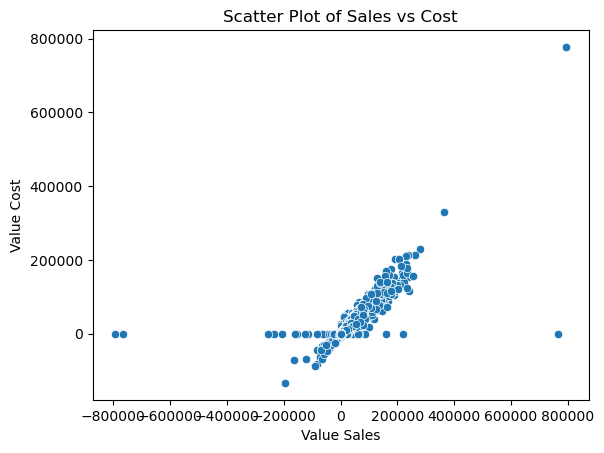

In [36]:
# Scatter plot of 'value_sales' vs 'value_cost'
sns.scatterplot(x='value_sales_aud', y='value_cost_aud', data=combined)
plt.title('Scatter Plot of Sales vs Cost')
plt.xlabel('Value Sales')
plt.ylabel('Value Cost')
plt.show()

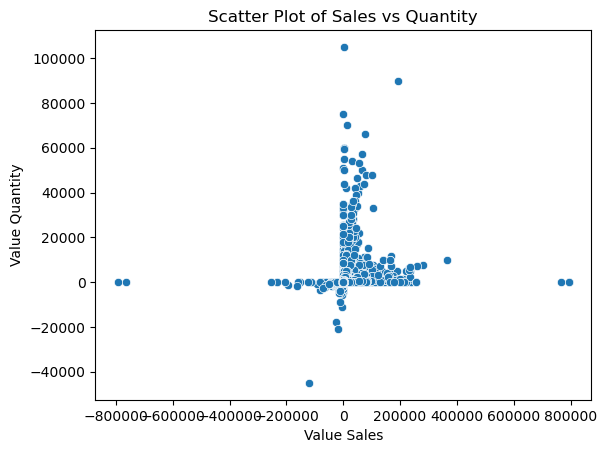

In [37]:
# Scatter plot of 'value_sales' vs 'value_cost'
sns.scatterplot(x='value_sales_aud', y='value_quantity', data=combined)
plt.title('Scatter Plot of Sales vs Quantity')
plt.xlabel('Value Sales')
plt.ylabel('Value Quantity')
plt.show()

In [38]:
# Filter data for negative values in value_sales, value_cost, or value_quantity
negative_values = combined[(combined['value_sales_aud'] < 0) | 
                           (combined['value_cost_aud'] < 0) | 
                           (combined['value_quantity'] < 0)]

# Count the number of records with negative values for each order type
negative_counts_by_order_type = negative_values.groupby('order_type_code').size()
negative_counts_by_order_type

order_type_code
CDG    12282
CPR      616
CRD    47507
CRP      294
CRR    45809
NOH      374
NOR     3576
PMO        1
ZCG     1931
ZCR     1402
dtype: int64

Actions Taken:
1. Legitimate Negative Values
- Retained credit-related transactions (CDG, CPR, CRD, etc.)
- These represent valid business operations like returns and adjustments
2. Removed Transactions
- Order types: PMO, NOH, NOR
- Reason: It's not seem rigid to have negative values in normal order
- Impact: Minimal data reduction while improving analysis quality

In [39]:
# Define the order types to filter
order_types_to_drop = ['PMO', 'NOH', 'NOR']

# Drop rows with negative values in specified order types
combined = combined[~((combined['order_type_code'].isin(order_types_to_drop)) & 
                      ((combined['value_sales_aud'] < 0) | 
                       (combined['value_cost_aud'] < 0) | 
                       (combined['value_quantity'] < 0)))]

In [40]:
combined.shape

(1969719, 39)

## Detecting Outliers

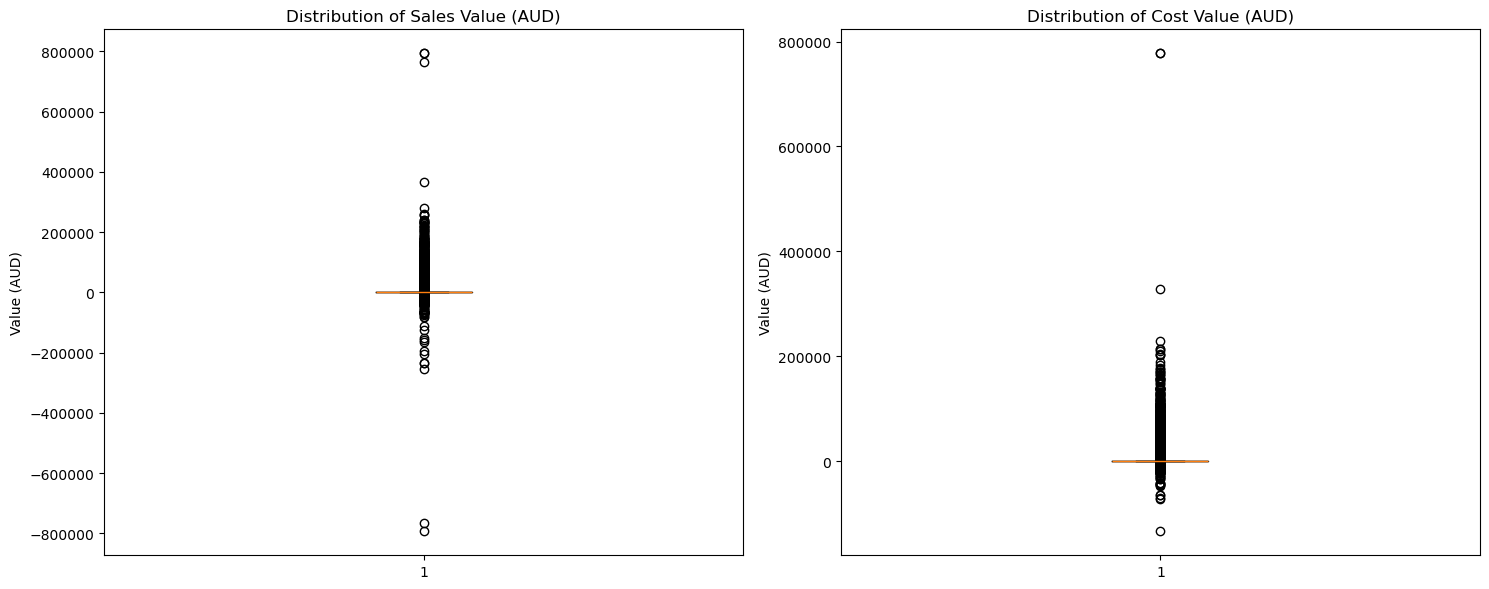

In [41]:
# Create a figure with two subplots side by side
plt.figure(figsize=(15,6))

# Boxplot for value_sales_aud
plt.subplot(121)
plt.boxplot(combined['value_sales_aud'])
plt.title('Distribution of Sales Value (AUD)')
plt.ylabel('Value (AUD)')

# Boxplot for value_cost_aud  
plt.subplot(122)
plt.boxplot(combined['value_cost_aud'])
plt.title('Distribution of Cost Value (AUD)')
plt.ylabel('Value (AUD)')

plt.tight_layout()
plt.show()


## Section 2: Exploratory Data

#### Transactions by order_type_code

 | Code | Description |
|------|-------------|
| NOR  | Normal Order |
| EDI  | EDI Order |
| CDG  | Credit Damaged Goods Not Returned |
| PRO  | Project Order |
| NOS  | Normal Order - Site Delivery Direct |
| CRR  | Credit Goods Return |
| EXP  | Export Order |
| CSH  | Cash Order |
| PRD  | Project Order - Site Delivery |
| CRD  | Credit Price Only |
| NOH  | Normal Order Head Office Sales |
| COP  | Charge Only - Price Adjustment |
| MIN  | Minimum Sell Override |
| COA  | Charge Only - Stock Adjustment |
| PSA  | Project Sample For Approval |
| WDC  | Wrong Delivery Charge |
| PMO  | Project Order - Moonlighting |
| CPR  | Credit Project Goods Return |
| CRP  | Credit Project Price Only |
| AES  | Aesthetics Lighting Only |
| ZCG  | Credit Goods Return - Pnz Only |
| ZCR  | Credit Price - Pnz Only |
| SPC  | Specialty Order |
| PUP  | Pick Up Order |




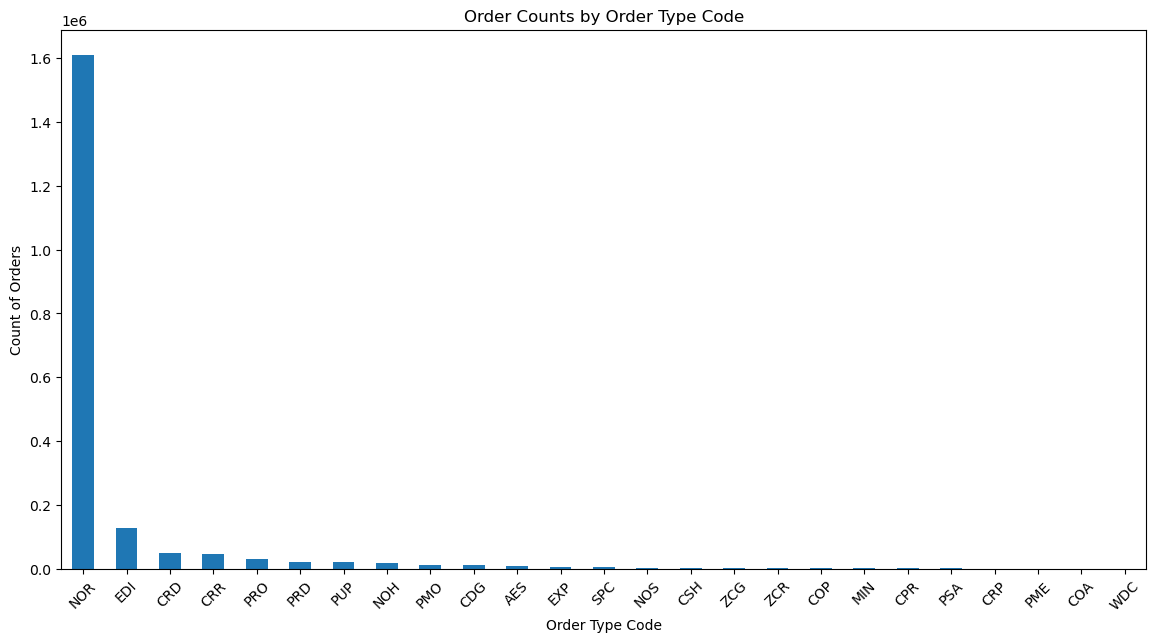

In [42]:
order_counts = combined['order_type_code'].value_counts()

# Plotting bar chart
plt.figure(figsize=(14, 7))
order_counts.plot(kind='bar')
plt.title("Order Counts by Order Type Code")
plt.xlabel("Order Type Code")
plt.ylabel("Count of Orders")
plt.xticks(rotation=45)
plt.show()

In [43]:
nor_order = combined[combined['order_type_code'] == 'NOR']

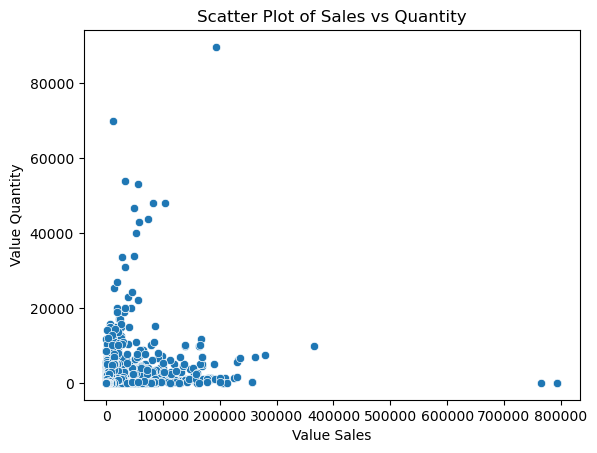

In [44]:
# Scatter plot of 'value_sales' vs 'value_cost'
sns.scatterplot(x='value_sales_aud', y='value_quantity', data=nor_order)
plt.title('Scatter Plot of Sales vs Quantity')
plt.xlabel('Value Sales')
plt.ylabel('Value Quantity')
plt.show()

### Time gap between order date and invoice date

In [45]:
time_gap = nor_order.copy()

# Convert 'order_date' and 'invoice_date' to datetime if they are not already
time_gap['order_date'] = pd.to_datetime(time_gap['order_date'])
time_gap['invoice_date'] = pd.to_datetime(time_gap['invoice_date'])

# Calculate the time difference
time_gap['time_gap'] = time_gap['invoice_date'] - time_gap['order_date']

# Convert the time difference to days
time_gap['time_gap_days'] = time_gap['time_gap'].dt.days

# Display the first few rows to check the output
print(time_gap[['order_date', 'invoice_date', 'time_gap', 'time_gap_days']].head(20))

   order_date invoice_date time_gap  time_gap_days
0  2012-05-09   2012-05-09   0 days              0
1  2012-02-16   2012-02-16   0 days              0
2  2012-05-08   2012-05-09   1 days              1
5  2012-05-03   2012-05-04   1 days              1
6  2012-06-26   2012-06-26   0 days              0
7  2012-06-05   2012-06-05   0 days              0
8  2012-06-22   2012-06-22   0 days              0
9  2012-04-03   2012-04-03   0 days              0
10 2012-04-18   2012-04-18   0 days              0
11 2012-01-11   2012-01-18   7 days              7
12 2012-01-17   2012-01-17   0 days              0
13 2012-03-29   2012-04-20  22 days             22
14 2012-04-03   2012-04-04   1 days              1
15 2012-04-23   2012-04-23   0 days              0
16 2012-01-25   2012-01-25   0 days              0
17 2012-04-27   2012-04-27   0 days              0
20 2012-03-19   2012-03-19   0 days              0
21 2012-06-06   2012-06-06   0 days              0
23 2012-02-10   2012-02-10   0 

In [46]:
time_gap.describe()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,value_quantity,value_price_adjustment,invoice_date,order_date,value_cost_aud,value_sales_aud,time_gap,time_gap_days
count,1608956,1608956.0000,1608956.0000,1608956.0000,1608956.0000,1608956.0000,1608956.0000,1608956.0000,1608956,1608956,1608956.0000,1608956.0000,1608956,1608956.0000
mean,2012-12-16 18:00:00.912890368,2012.9579,6.5616,2012.4769,6.3331,15.3931,26.2149,0.0000,2012-12-16 18:00:00.912890368,2012-12-14 04:48:40.961915904,228.3859,353.4950,2 days 13:11:19.950974420,2.5495
min,2012-01-02 00:00:00,2012.0000,1.0000,2012.0000,1.0000,1.0000,0.7500,0.0000,2012-01-02 00:00:00,2010-11-15 00:00:00,0.0000,0.0000,0 days 00:00:00,0.0000
25%,2012-06-15 00:00:00,2012.0000,3.0000,2012.0000,4.0000,8.0000,3.0000,0.0000,2012-06-15 00:00:00,2012-06-14 00:00:00,10.4030,25.8000,0 days 00:00:00,0.0000
50%,2012-12-05 00:00:00,2013.0000,7.0000,2012.0000,6.0000,15.0000,8.0000,0.0000,2012-12-05 00:00:00,2012-12-04 00:00:00,30.0100,65.1100,0 days 00:00:00,0.0000
75%,2013-06-18 00:00:00,2013.0000,10.0000,2013.0000,9.0000,23.0000,20.0000,0.0000,2013-06-18 00:00:00,2013-06-14 00:00:00,89.6411,177.5800,1 days 00:00:00,1.0000
max,2013-12-31 00:00:00,2014.0000,12.0000,2013.0000,12.0000,31.0000,89650.0000,0.0000,2013-12-31 00:00:00,2013-12-30 00:00:00,777669.2000,793541.9800,652 days 00:00:00,652.0000
std,NaN,0.7084,3.6363,0.4995,3.2312,8.6855,209.8656,0.0000,NaN,NaN,1939.6117,2512.6585,12 days 12:11:18.749883996,12.5079


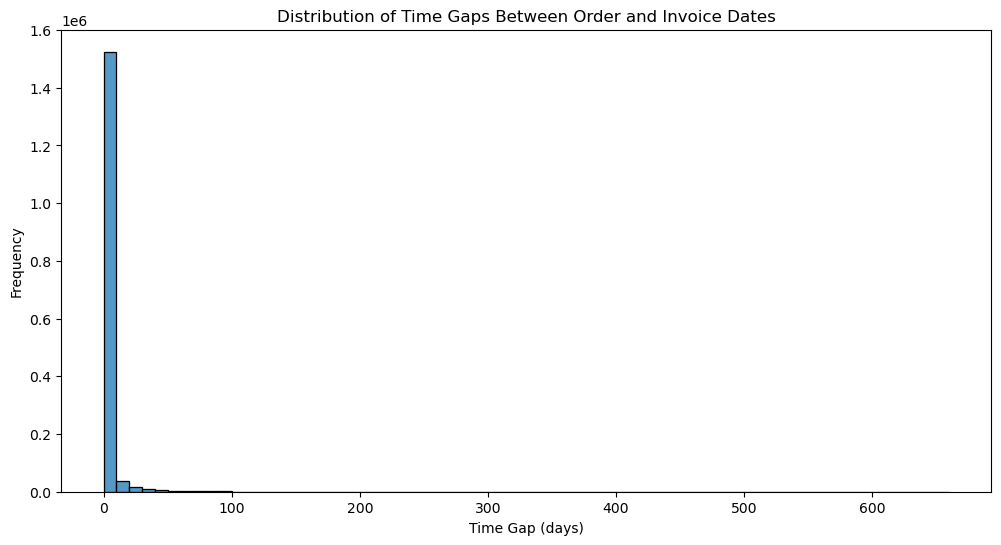

In [47]:
# Histogram to view the distribution of time gaps

max_days = time_gap['time_gap_days'].max()
bin_width = 10  # You can change this to any number that suits your analysis

plt.figure(figsize=(12, 6))

# Create bins from 0 to max_days with each bin having a width of 'bin_width'
bins = np.arange(0, max_days + bin_width, bin_width)

# Plot the histogram with these bins
sns.histplot(time_gap['time_gap_days'], bins=bins, kde=False)
plt.title('Distribution of Time Gaps Between Order and Invoice Dates')
plt.xlabel('Time Gap (days)')
plt.ylabel('Frequency')
# plt.ylim(0, 500)  # Adjust based on your frequency distribution
plt.show()

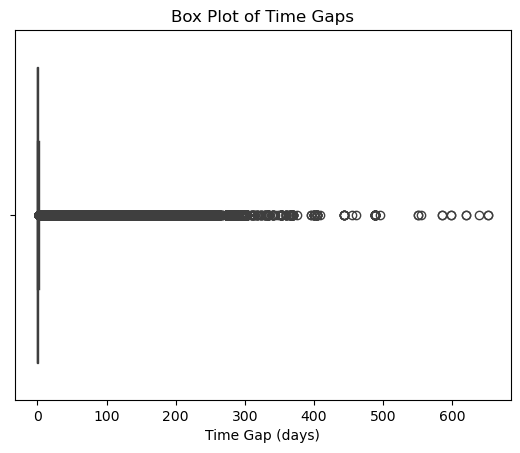

In [48]:
# Box plot to visualize outliers
sns.boxplot(x=time_gap['time_gap_days'])
plt.title('Box Plot of Time Gaps')
plt.xlabel('Time Gap (days)')
plt.show()

#### Explore Business Area impact on the Time Gap (days)

1. Business Area Distribution

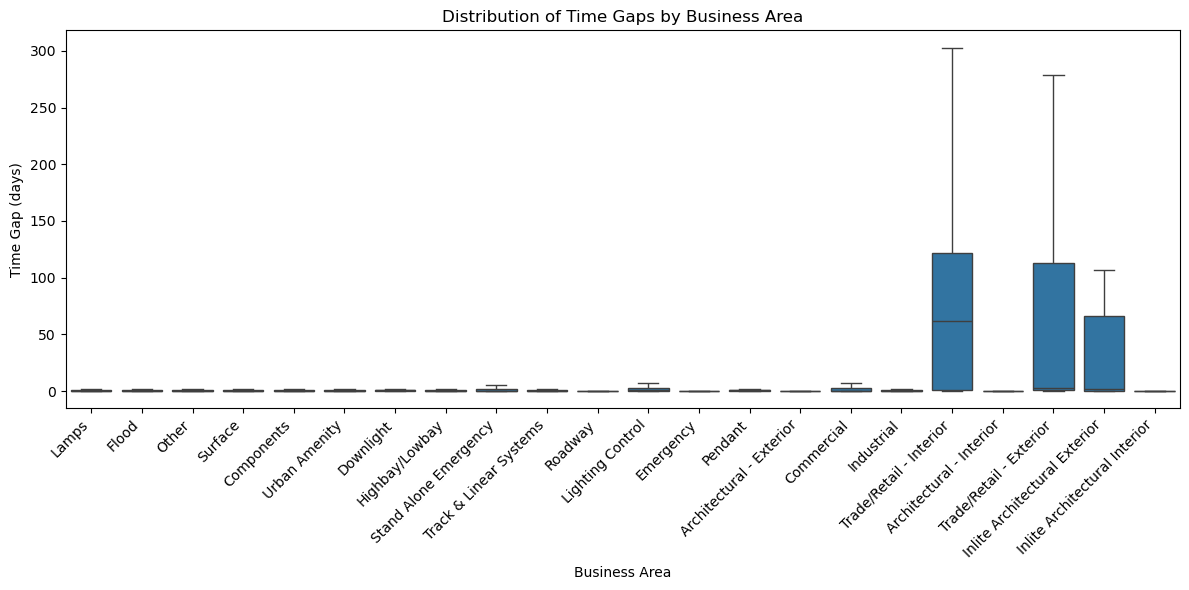

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=time_gap, x='business_area_name', y='time_gap_days', showfliers=False)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Time Gaps by Business Area')
plt.xlabel('Business Area')
plt.ylabel('Time Gap (days)')
plt.tight_layout()
plt.show()

2. Calculate summary statistics of time gap by business area

In [50]:
business_area_timegap = time_gap.groupby('business_area_name')['time_gap_days'].agg([
    'count',
    'mean',
    'median',
    'std',
    'min',
    ('q25', lambda x: x.quantile(0.25)),
    ('q75', lambda x: x.quantile(0.75)),
    'max'
]).round(2)

print("\nSummary statistics of time gap by business area:")
print(business_area_timegap.sort_values('count', ascending=False))


Summary statistics of time gap by business area:
                                count    mean  median     std  min    q25  \
business_area_name                                                          
Lamps                          728830  1.4000  0.0000  6.6600    0 0.0000   
Surface                        307910  3.2500  0.0000 13.6400    0 0.0000   
Components                     165718  2.5000  0.0000 12.0900    0 0.0000   
Other                          129313  2.2500  0.0000 10.1000    0 0.0000   
Downlight                       74953  2.9400  1.0000 10.6800    0 0.0000   
Flood                           69626  6.3900  0.0000 21.5900    0 0.0000   
Track & Linear Systems          45559  1.6900  0.0000  8.1400    0 0.0000   
Urban Amenity                   23050  2.5100  0.0000 10.6300    0 0.0000   
Roadway                         16781  0.6100  0.0000  4.5800    0 0.0000   
Stand Alone Emergency           14774  3.2800  0.0000  8.7800    0 0.0000   
Highbay/Lowbay            

3. Create a violin plot to see the distribution shape

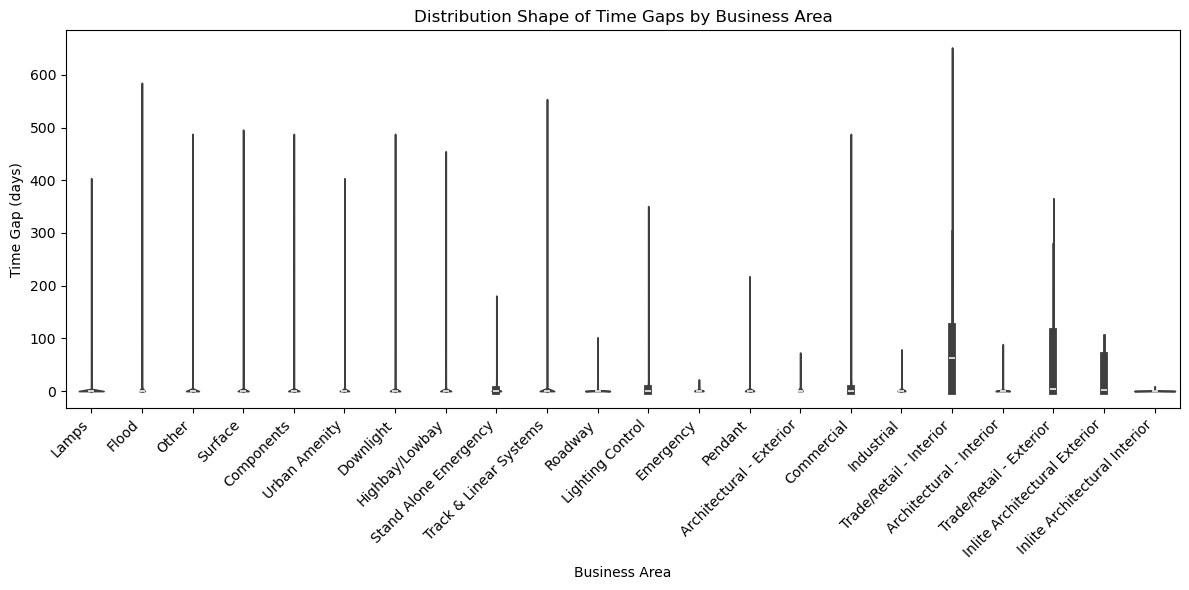

In [51]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=time_gap, x='business_area_name', y='time_gap_days', cut=0)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution Shape of Time Gaps by Business Area')
plt.xlabel('Business Area')
plt.ylabel('Time Gap (days)')
plt.tight_layout()
plt.show()

4. Remove outliers by business area

 As we can see from the violin plot, the distribution shape of time gaps by business area is not normal. There are some outliers in the data. So, we will remove them by using the IQR method.

Removed 215124 records (13.37% of total)


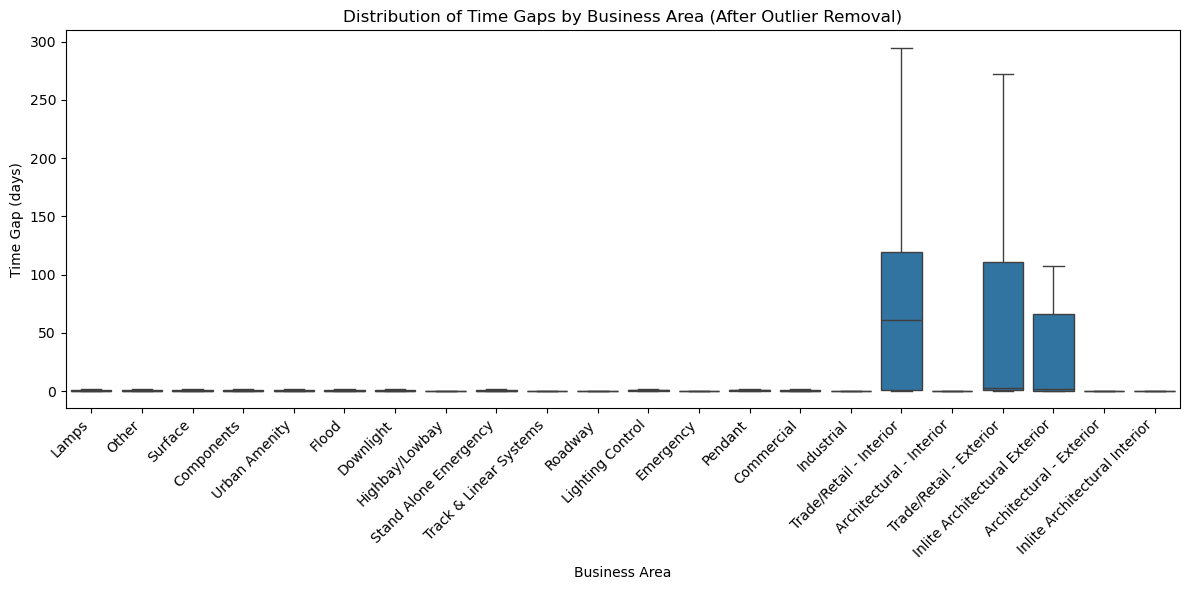

In [52]:
# Calculate outlier bounds for each business area
def remove_outliers_by_group(df, group_col, value_col):
    # Create a copy of the dataframe
    df_clean = df.copy()
    
    # Calculate Q1, Q3, and IQR for each business area
    stats = df.groupby(group_col)[value_col].agg([
        ('q1', lambda x: x.quantile(0.25)),
        ('q3', lambda x: x.quantile(0.75)),
        'count'
    ])
    
    # Calculate IQR and bounds
    stats['iqr'] = stats['q3'] - stats['q1']
    stats['lower_bound'] = stats['q1'] - 1.5 * stats['iqr']
    stats['upper_bound'] = stats['q3'] + 1.5 * stats['iqr']
    
    # Create a mask for valid records
    mask = pd.Series(False, index=df.index)
    
    # Apply bounds for each business area
    for area in df[group_col].unique():
        area_mask = (df[group_col] == area) & \
                   (df[value_col] >= stats.loc[area, 'lower_bound']) & \
                   (df[value_col] <= stats.loc[area, 'upper_bound'])
        mask = mask | area_mask
    
    # Apply the mask and reset index
    df_clean = df_clean[mask].reset_index(drop=True)
    
    # Print summary of removed records
    removed_count = len(df) - len(df_clean)
    print(f"Removed {removed_count} records ({(removed_count/len(df)*100):.2f}% of total)")
    
    return df_clean

# Remove outliers
time_gap_clean = remove_outliers_by_group(time_gap, 'business_area_name', 'time_gap_days')

# Create a box plot to visualize the cleaned data
plt.figure(figsize=(12, 6))
sns.boxplot(data=time_gap_clean, x='business_area_name', y='time_gap_days', showfliers=False)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Time Gaps by Business Area (After Outlier Removal)')
plt.xlabel('Business Area')
plt.ylabel('Time Gap (days)')
plt.tight_layout()
plt.show()

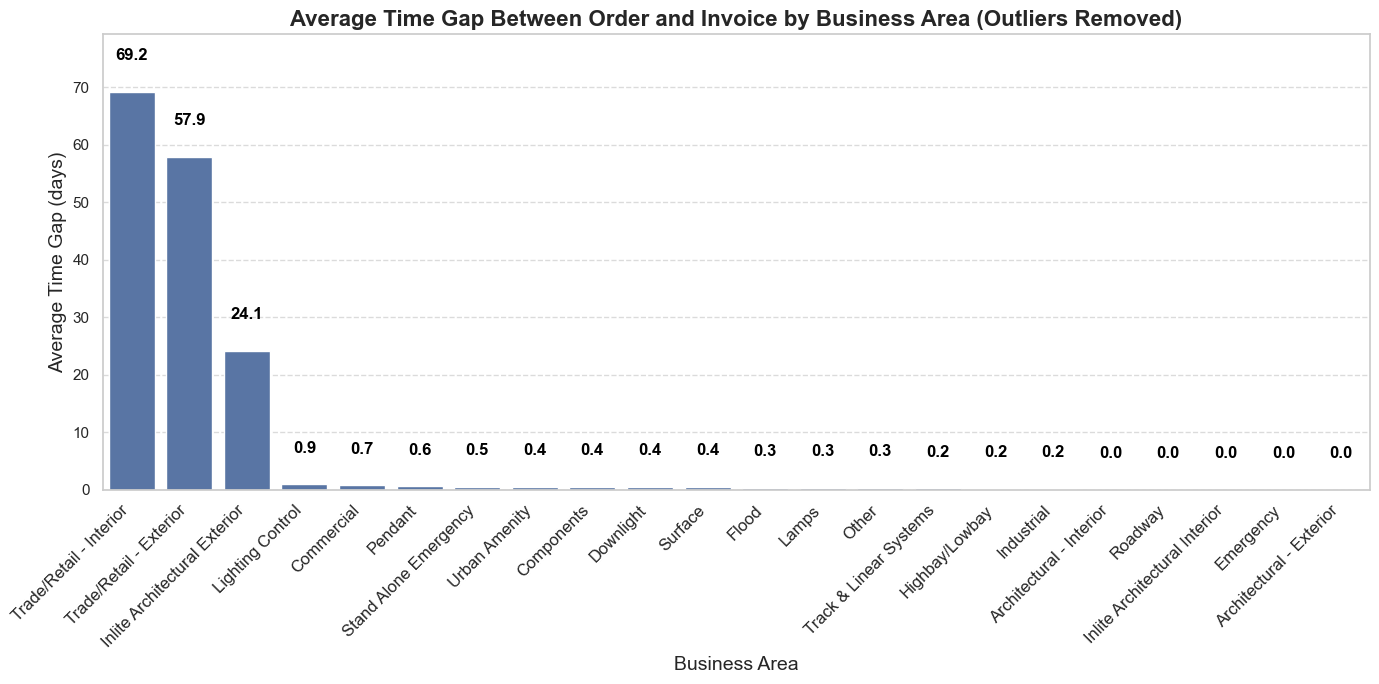

In [53]:
# Calculate average time gap by business area
avg_time_gap = time_gap_clean.groupby('business_area_name')['time_gap_days'].mean().sort_values(ascending=False)

# Create bar plot
# Set a modern style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Use a vibrant color palette
ax = sns.barplot(x=avg_time_gap.index, y=avg_time_gap.values)

# Rotate x-tick labels and adjust alignment
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Average Time Gap Between Order and Invoice by Business Area (Outliers Removed)', fontsize=16, fontweight='bold')
plt.xlabel('Business Area', fontsize=14)
plt.ylabel('Average Time Gap (days)', fontsize=14)
plt.ylim(0, max(avg_time_gap.values) + 10)

# Add data labels with custom styling
for i, mean in enumerate(avg_time_gap.values):
    ax.text(i, mean + 5, f'{mean:.1f}', ha='center', va='bottom', color='black', fontweight='bold')

# Add gridlines and adjust layout
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [54]:
business_area_timegap_c = time_gap_clean.groupby('business_area_name')['time_gap_days'].agg([
    'count',
    'mean',
    'median',
    'std',
    'min',
    ('q25', lambda x: x.quantile(0.25)),
    ('q75', lambda x: x.quantile(0.75)),
    'max'
]).round(2)

print("\nSummary statistics of time gap by business area (After removed outliers):")
print(business_area_timegap_c.sort_values('count', ascending=False))


Summary statistics of time gap by business area (After removed outliers):
                                count    mean  median     std  min    q25  \
business_area_name                                                          
Lamps                          661263  0.3100  0.0000  0.5100    0 0.0000   
Surface                        252324  0.4000  0.0000  0.5600    0 0.0000   
Components                     139935  0.4100  0.0000  0.5500    0 0.0000   
Other                          109508  0.3000  0.0000  0.5000    0 0.0000   
Downlight                       59404  0.4100  0.0000  0.5600    0 0.0000   
Flood                           54027  0.3400  0.0000  0.5300    0 0.0000   
Track & Linear Systems          40994  0.1900  0.0000  0.4300    0 0.0000   
Urban Amenity                   19858  0.4100  0.0000  0.5500    0 0.0000   
Roadway                         16326  0.0000  0.0000  0.0000    0 0.0000   
Stand Alone Emergency           12201  0.4800  0.0000  1.0500    0 0.0000   
H

### Customer Retention Rates

In this section, we analyze customer retention patterns between 2012 and 2013. The analysis explores overall retention rates, customer behavior metrics like order frequency and sales volume, characteristics of retained vs lost customers, and factors that may influence retention. This helps identify opportunities to improve customer retention strategies and understand what drives customer loyalty in the business.



In [55]:
# Get unique customers for each year
customers_2012 = nor_order[nor_order['calendar_year'] == 2012]['customer_code'].unique()
customers_2013 = nor_order[nor_order['calendar_year'] == 2013]['customer_code'].unique()

In [56]:
# Calculate base retention metrics
retained_customers = np.intersect1d(customers_2012, customers_2013)
total_2012_customers = len(customers_2012)
retained_count = len(retained_customers)
retention_rate = (retained_count / total_2012_customers) * 100

In the code block below, we will create a retention dataframe that tracks which customers from 2012 remained active in 2013. we will calculate key metrics for each customer in both 2012 and 2013, including number of orders, total sales value, average order value, total quantity purchased, and first/last purchase dates. These metrics will then be merged together to analyze differences between retained and lost customers.




In [57]:
# Create retention dataframe
retention_df = pd.DataFrame({'customer_code': customers_2012})
retention_df['active_2012'] = True
retention_df['active_2013'] = retention_df['customer_code'].isin(customers_2013)
retention_df['status'] = retention_df['active_2013'].map({True: 'Retained', False: 'Lost'})
# Calculate customer metrics for 2012
metrics_2012 = nor_order[nor_order['calendar_year'] == 2012].groupby('customer_code').agg({
    'customer_order_number': 'nunique', 
    'value_sales_aud': ['sum', 'mean'],
    'value_quantity': 'sum',
    'accounting_date': ['min', 'max']
}).reset_index()

metrics_2012.columns = ['customer_code', 
                       'orders_2012', 'total_sales_2012', 'avg_order_value_2012',
                       'total_quantity_2012', 'first_purchase_2012', 'last_purchase_2012']


metrics_2013 = nor_order[nor_order['calendar_year'] == 2013].groupby('customer_code').agg({
    'customer_order_number': 'nunique', 
    'value_sales_aud': ['sum', 'mean'],
    'value_quantity': 'sum',
    'accounting_date': ['min', 'max']
}).reset_index()

metrics_2013.columns = ['customer_code', 
                       'orders_2013', 'total_sales_2013', 'avg_order_value_2013',
                       'total_quantity_2013', 'first_purchase_2013', 'last_purchase_2013']

# Merge metrics into retention_df
retention_df = retention_df.merge(metrics_2012, on='customer_code', how='left')
retention_df = retention_df.merge(metrics_2013, on='customer_code', how='left')



In [58]:
retention_df.head()

,customer_code,active_2012,active_2013,status,orders_2012,total_sales_2012,avg_order_value_2012,total_quantity_2012,first_purchase_2012,last_purchase_2012,orders_2013,total_sales_2013,avg_order_value_2013,total_quantity_2013,first_purchase_2013,last_purchase_2013
0,411800601,True,True,Retained,483,354798.8100,327.3052,42231.0000,2012-01-03,2012-12-20,453.0000,313233.1400,304.1098,40358.0000,2013-01-07,2013-12-20
1,361000403,True,True,Retained,434,392641.2800,254.3013,32468.0000,2012-01-09,2012-12-21,286.0000,248175.6600,245.2329,33648.0000,2013-01-07,2013-12-16
2,361000410,True,True,Retained,299,223266.5700,193.1372,28506.0000,2012-01-09,2012-12-20,315.0000,221728.5400,197.2674,27292.0000,2013-01-08,2013-12-19
3,361010426,True,True,Retained,128,206470.6200,335.1796,13467.0000,2012-01-10,2012-12-18,160.0000,179406.9200,288.4356,16377.0000,2013-01-08,2013-12-17
4,361001440,True,True,Retained,143,67616.3900,134.1595,8597.0000,2012-01-04,2012-12-20,174.0000,89930.7800,169.0428,9611.0000,2013-01-08,2013-12-19


Customer Retention Analysis 2012-2013:
Total customers in 2012: 3,468
Customers retained in 2013: 3,018
Overall retention rate: 87.0%


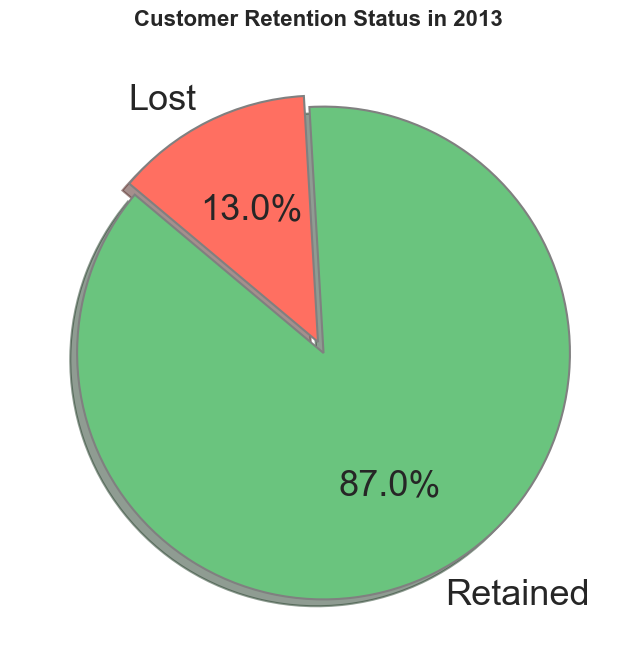

In [59]:
print(f"Customer Retention Analysis 2012-2013:")
print(f"Total customers in 2012: {total_2012_customers:,}")
print(f"Customers retained in 2013: {retained_count:,}")
print(f"Overall retention rate: {retention_rate:.1f}%")


# Pie chart of retention status
customer_status = pd.DataFrame({
    'Status': ['Retained', 'Lost'],
    'Count': [retained_count, total_2012_customers - retained_count]
})

# Colors and explode settings
colors = ['#6AC47E', '#FF6F61']  # Updated color palette
explode = (0.05, 0)  # Slightly separate the "Retained" section

# Create pie chart with improved aesthetics
plt.figure(figsize=(8, 8))
plt.pie(customer_status['Count'], 
        labels=customer_status['Status'],
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=explode,
        shadow=True,
        wedgeprops={'edgecolor': 'grey', 'linewidth': 1.5},
        textprops={'fontsize': 26})

# Title with larger, bold font
plt.title('Customer Retention Status in 2013', fontsize=16, fontweight='bold')

plt.show()

### Revenue Segmentation Analysis

The analysis examines customer retention patterns based on revenue segments. Customers were segmented
into revenue bands (<$1K, $1K-$5K, $5K-$10K, $10K-$50K, >$50K) to understand how spending levels 
correlate with retention behavior. Retention rates were calculated for each segment and visualized 
through a bar chart to clearly display the relationship between revenue and retention rates. A detailed 
segment analysis was performed examining key metrics including customer counts, retention percentages, 
and both total and average revenue per segment. This comprehensive analysis provides valuable insights 
into how customer spending patterns influence their likelihood to remain active customers.





C:\Users\reo_c\AppData\Local\Temp\ipykernel_27872\929655515.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retention_by_revenue = retention_df.groupby('revenue_segment')['status'].apply(


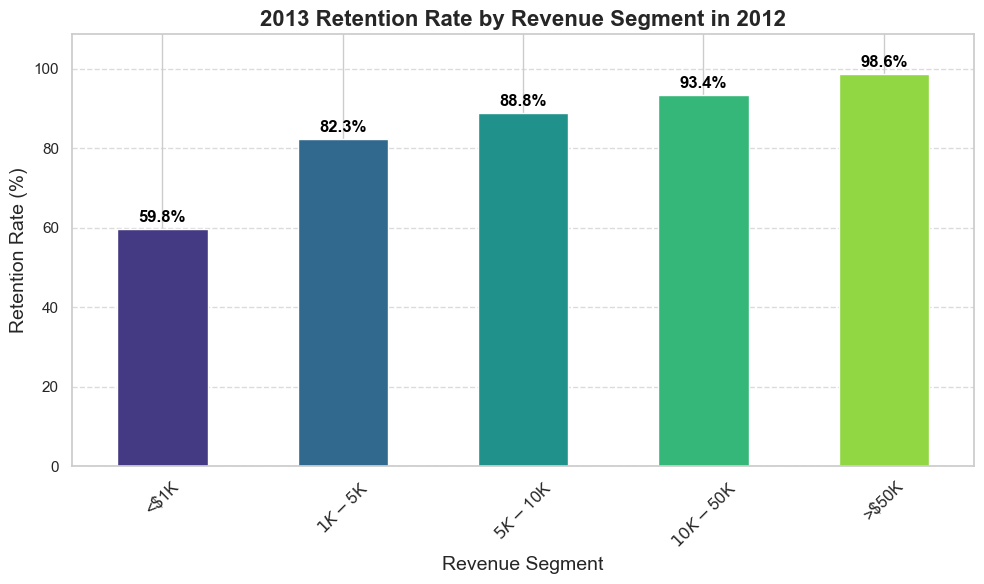

C:\Users\reo_c\AppData\Local\Temp\ipykernel_27872\929655515.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = retention_df.groupby('revenue_segment').agg({


In [60]:
# Create customer revenue segments
revenue_bins = [0, 1000, 5000, 10000, 50000, float('inf')]
revenue_labels = ['<$1K', '$1K-$5K', '$5K-$10K', '$10K-$50K', '>$50K']

# Segment the data based on revenue
retention_df['revenue_segment'] = pd.cut(retention_df['total_sales_2012'], 
                                       bins=revenue_bins, 
                                       labels=revenue_labels)

# Calculate retention rate by revenue segment
retention_by_revenue = retention_df.groupby('revenue_segment')['status'].apply(
    lambda x: (x == 'Retained').mean() * 100
).round(1)

# Set a modern style and color palette
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Define color palette for bars
ax = retention_by_revenue.plot(kind='bar', color=sns.color_palette("viridis", len(retention_by_revenue)))

# Customize title and labels
plt.title('2013 Retention Rate by Revenue Segment in 2012', fontsize=16, fontweight='bold')
plt.ylabel('Retention Rate (%)', fontsize=14)
plt.xlabel('Revenue Segment', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.ylim(0, retention_by_revenue.max() + 10)

# Add data labels with improved styling
for i, rate in enumerate(retention_by_revenue):
    ax.text(i, rate + 1, f"{rate}%", ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Add a subtle grid and adjust layout
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


# Detailed segment analysis
segment_analysis = retention_df.groupby('revenue_segment').agg({
    'customer_code': 'count',
    'status': lambda x: (x == 'Retained').mean() * 100,
    'total_sales_2012': ['sum', 'mean']
}).round(2)

# Rename columns for clarity
segment_analysis.columns = ['Customer Count', 'Retention Rate %', 'Total Revenue', 'Avg Revenue']

The bar chart shows a clear upward trend in retention as revenue increases:

- Customers in the <$1K segment have the lowest retention rate at 59.8%.
- Retention improves with higher revenue, reaching nearly 100% for the >$50K segment.

C:\Users\reo_c\AppData\Local\Temp\ipykernel_27872\3404129065.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_frequency_analysis = retention_df.groupby('order_segment').agg({
C:\Users\reo_c\AppData\Local\Temp\ipykernel_27872\3404129065.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retention_by_frequency = retention_df.groupby('order_segment')['status'].apply(


<Figure size 1500x600 with 0 Axes>

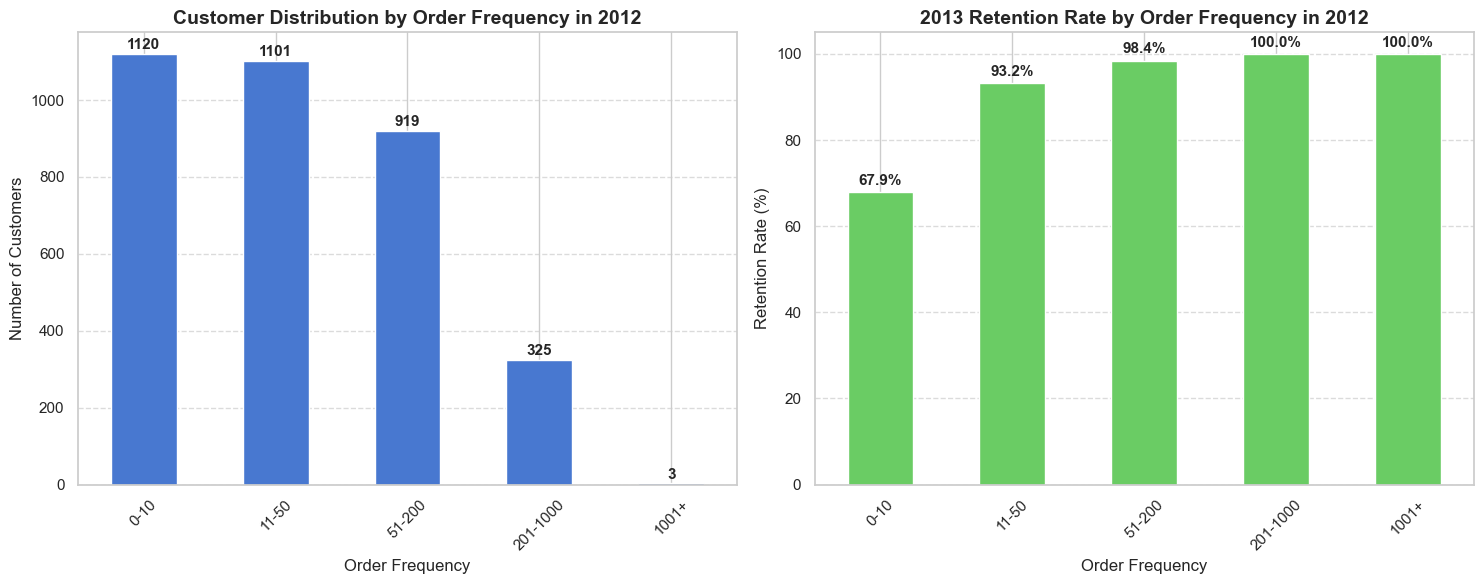

In [61]:
# Define the bins and labels
order_bins = [0, 10, 50, 200, 1000, float('inf')]
order_labels = ['0-10', '11-50', '51-200', '201-1000', '1001+']

# Segment the data based on order frequency
retention_df['order_segment'] = pd.cut(retention_df['orders_2012'], 
                                       bins=order_bins, 
                                       labels=order_labels)

# Calculate metrics for order frequency segments
order_frequency_analysis = retention_df.groupby('order_segment').agg({
    'customer_code': 'count',  # Number of customers
    'status': lambda x: (x == 'Retained').mean() * 100,  # Retention rate
    'total_sales_2012': ['sum', 'mean']  # Sales metrics
}).round(2)

order_frequency_analysis.columns = ['Customer Count', 'Retention Rate %', 'Total Revenue', 'Avg Revenue']

# Set a modern style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Customer distribution across order segments with improved colors and labels
customer_counts = retention_df['order_segment'].value_counts().reindex(order_labels)
customer_counts.plot(kind='bar', ax=ax1, color=sns.color_palette("muted")[0])
ax1.set_title('Customer Distribution by Order Frequency in 2012', fontsize=14, fontweight='bold')
ax1.set_xlabel('Order Frequency', fontsize=12)
ax1.set_ylabel('Number of Customers', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Add data labels for customer distribution
for i, count in enumerate(customer_counts):
    ax1.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Retention rate by order frequency with improved colors and labels
retention_by_frequency = retention_df.groupby('order_segment')['status'].apply(
    lambda x: (x == 'Retained').mean() * 100
).round(1)

retention_by_frequency.plot(kind='bar', ax=ax2, color=sns.color_palette("muted")[2])
ax2.set_title('2013 Retention Rate by Order Frequency in 2012', fontsize=14, fontweight='bold')
ax2.set_xlabel('Order Frequency', fontsize=12)
ax2.set_ylabel('Retention Rate (%)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

# Add data labels for retention rate
for i, rate in enumerate(retention_by_frequency):
    ax2.text(i, rate + 1, f"{rate}%", ha='center', va='bottom', fontsize=11, fontweight='bold')

# Gridlines and layout adjustments
for ax in [ax1, ax2]:
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Customer Distribution by 2012 Order Frequency**

The majority of customers fall into the 201-1000 orders segment, with 1182 customers, followed by 51-200 orders and 0-10 orders, with 829 and 684 customers, respectively.

The smallest segment is 1001+ orders, with only 104 customers, indicating that very few customers place extremely high numbers of orders.

This distribution suggests that most customers have a moderate to high order frequency, with fewer at the extremes. The large number of customers in the 201-1000 and 51-200 segments indicates a substantial base of moderately engaged customers.


**2013 Retention Rate by 2012 Order Frequency**

The analysis shows a strong positive correlation between order frequency and retention:

- Retention rates increase steadily with higher order frequency
- Customers with 0-10 orders in 2012 had the lowest retention rate (58.2%)
- Higher segments showed progressively better retention:
  - 11-50 orders: 85.9%
  - 51-200 orders: 92.8% 
  - 201-1000 orders: 99.2%
  - 1001+ orders: 100%
- The 1001+ segment, while smallest, represents the most loyal customers with perfect retention

### New Customer in 2013 by Environment Group

In [62]:
# Get all unique customer codes from 2012 and 2013
customers_2012 = nor_order[nor_order['calendar_year'] == 2012]['customer_code'].unique()
customers_2013 = nor_order[nor_order['calendar_year'] == 2013]['customer_code'].unique()

# Find new customers in 2013 (customers in 2013 but not in 2012)
new_customers_2013 = set(customers_2013) - set(customers_2012)

# Create a dataframe with only new 2013 customers
new_customer_orders = nor_order[
    (nor_order['customer_code'].isin(new_customers_2013)) & 
    (nor_order['calendar_year'] == 2013)
]

# Calculate key metrics for new customers
new_customer_metrics = {
    'Number of New Customers': len(new_customers_2013),
    'Total Orders': new_customer_orders['customer_order_number'].nunique(),
    'Total Sales Value': new_customer_orders['value_sales_aud'].sum(),
    'Average Order Value': new_customer_orders['value_sales_aud'].mean(),
    'Total Quantity': new_customer_orders['value_quantity'].sum()
}

print("New Customer Analysis for 2013:")
for metric, value in new_customer_metrics.items():
    if metric in ['Total Sales Value', 'Average Order Value']:
        print(f"{metric}: ${value:,.2f}")
    else:
        print(f"{metric}: {value:,.0f}")

# Calculate percentage of total customers that are new
total_customers_2013 = len(customers_2013)
new_customer_percentage = (len(new_customers_2013) / total_customers_2013) * 100
print(f"\nNew customers represent {new_customer_percentage:.1f}% of total customers in 2013")

New Customer Analysis for 2013:
Number of New Customers: 435
Total Orders: 3,375
Total Sales Value: $13,624,969.57
Average Order Value: $734.90
Total Quantity: 892,649

New customers represent 12.6% of total customers in 2013


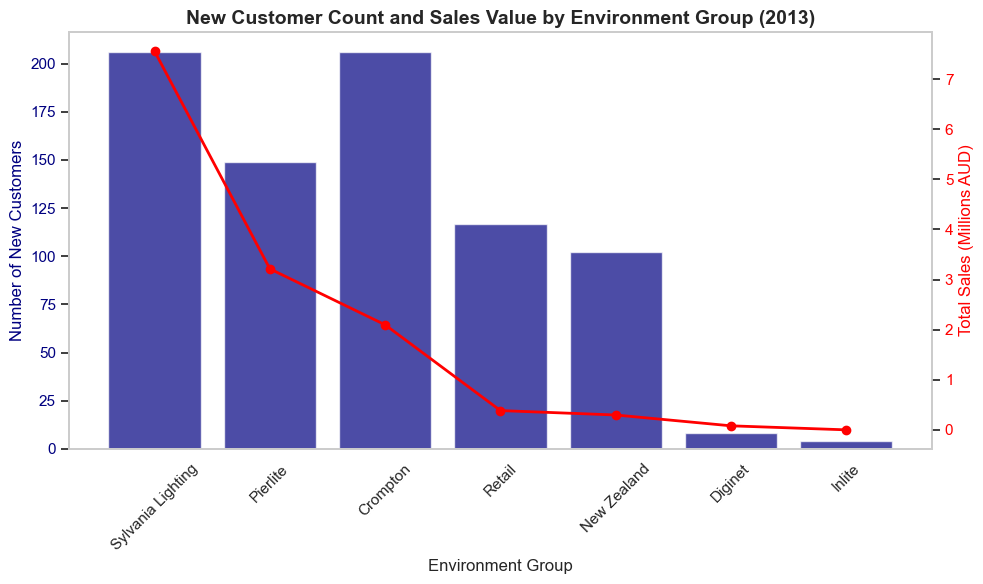


New Customer Analysis by Environment Group:

Top 3 Environment Codes by Number of New Customers:
Environment Sylvania Lighting: 206 customers (26.0%)
Environment Crompton: 206 customers (26.0%)
Environment Pierlite: 149 customers (18.8%)

Top 3 Environment Groups by Sales Value:
Environment Sylvania Lighting: $7.55M (55.4%)
Environment Pierlite: $3.21M (23.6%)
Environment Crompton: $2.10M (15.4%)

New Customer Analysis by Environment Group:

Top 3 Environment Codes by Number of New Customers:
Sylvania Lighting: 206 customers (26.0%)
Crompton: 206 customers (26.0%)
Pierlite: 149 customers (18.8%)

Top 3 Environment Groups by Sales Value:
Sylvania Lighting: $7,554,558.68 (55.4%)
Pierlite: $3,212,629.56 (23.6%)
Crompton: $2,095,670.92 (15.4%)


In [63]:
# Analyze new customers by environment code
new_customer_by_env = new_customer_orders.groupby('environment_group_code').agg({
    'customer_code': 'nunique',
    'value_sales_aud': 'sum',
    'value_quantity': 'sum'
}).reset_index()

# Mapping for environment group codes to descriptions only
env_labels = {
    'S': 'Sylvania Lighting',
    'P': 'Pierlite',
    'D': 'Diginet',
    'Z': 'New Zealand',
    'C': 'Crompton',
    'M': 'Moonlighting',
    'R': 'Retail',
    'I': 'Inlite',
    'NA': 'NA'
}

#Apply labels
new_customer_by_env['environment_group_code'] = new_customer_by_env['environment_group_code'].map(env_labels)

# Calculate average order value per environment code
new_customer_by_env['avg_order_value'] = new_customer_orders.groupby('environment_group_code')['value_sales_aud'].mean().values

# Calculate percentages
new_customer_by_env['customer_pct'] = new_customer_by_env['customer_code'] / new_customer_by_env['customer_code'].sum() * 100
new_customer_by_env['sales_pct'] = new_customer_by_env['value_sales_aud'] / new_customer_by_env['value_sales_aud'].sum() * 100

# Sort by sales value
new_customer_by_env = new_customer_by_env.sort_values('value_sales_aud', ascending=False)

# Create figure and subplot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 1: Bar plot for Customer Count by Environment Code
ax1.bar(new_customer_by_env['environment_group_code'], 
        new_customer_by_env['customer_code'], 
        color='navy', 
        alpha=0.7,
        label='New Customers')
ax1.set_title('New Customer Count and Sales Value by Environment Group (2013)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Environment Group', fontsize=12)
ax1.set_ylabel('Number of New Customers', fontsize=12, color='navy')
ax1.tick_params(axis='y', labelcolor='navy')
ax1.tick_params(axis='x', rotation=45)
# Remove grid for ax1
ax1.grid(False)

# Create second y-axis for sales value with improved styling
ax1_twin = ax1.twinx()
ax1_twin.plot(new_customer_by_env['environment_group_code'], 
              new_customer_by_env['value_sales_aud'] / 1_000_000, 
              color='red', 
              marker='o', 
              markersize=6,
              linewidth=2,
              linestyle='-', 
              label='Total Sales (Millions AUD)')
ax1_twin.set_ylabel('Total Sales (Millions AUD)', fontsize=12, color='red')
ax1_twin.tick_params(axis='y', labelcolor='red')
# Remove grid for ax1_twin
ax1_twin.grid(False)

plt.tight_layout()
plt.show()

# Print summary statistics with enhanced formatting
print("\nNew Customer Analysis by Environment Group:")
print("\nTop 3 Environment Codes by Number of New Customers:")
top_customers = new_customer_by_env.nlargest(3, 'customer_code')
for _, row in top_customers.iterrows():
    print(f"Environment {row['environment_group_code']}: {row['customer_code']:,} customers ({row['customer_pct']:.1f}%)")

print("\nTop 3 Environment Groups by Sales Value:")
top_sales = new_customer_by_env.nlargest(3, 'value_sales_aud')
for _, row in top_sales.iterrows():
    print(f"Environment {row['environment_group_code']}: ${row['value_sales_aud'] / 1_000_000:,.2f}M ({row['sales_pct']:.1f}%)")

# Print summary statistics
print("\nNew Customer Analysis by Environment Group:")
print("\nTop 3 Environment Codes by Number of New Customers:")
top_customers = new_customer_by_env.nlargest(3, 'customer_code')
for _, row in top_customers.iterrows():
    print(f"{row['environment_group_code']}: {row['customer_code']:,.0f} customers ({row['customer_pct']:.1f}%)")

print("\nTop 3 Environment Groups by Sales Value:")
top_sales = new_customer_by_env.nlargest(3, 'value_sales_aud')
for _, row in top_sales.iterrows():
    print(f"{row['environment_group_code']}: ${row['value_sales_aud']:,.2f} ({row['sales_pct']:.1f}%)")

### Monthly Sales Trend

The following analysis examines monthly sales patterns across the 2-year dataset period. We'll visualize the overall sales trend to identify long-term patterns and growth, while also breaking down the data by year to reveal any seasonal fluctuations. The analysis includes both visual representations through time series plots and key statistical measures to quantify the sales performance and variations across different time periods.



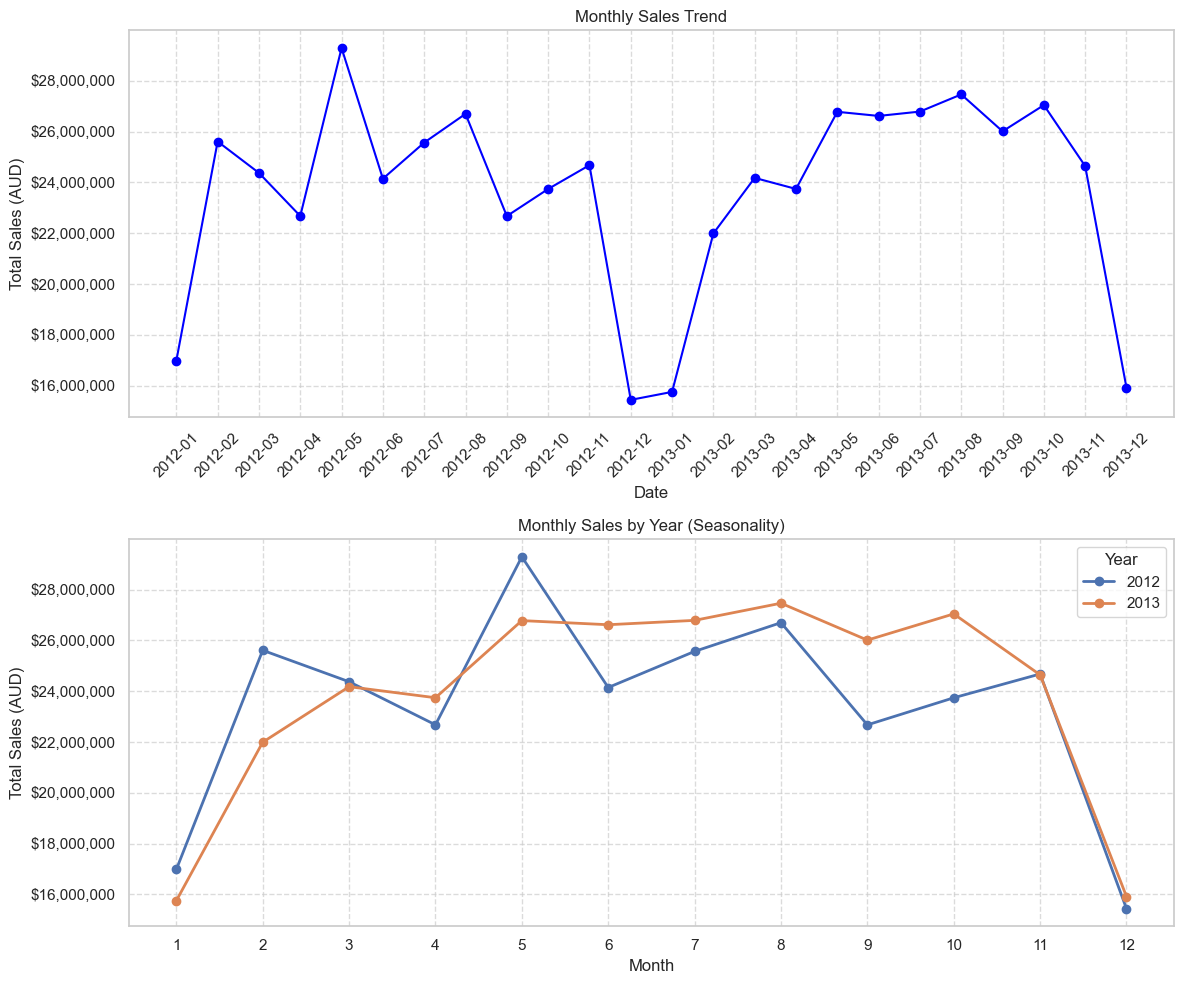


Sales Trend Analysis:
--------------------------------------------------
Average Monthly Sales: $23,698,245.11
Highest Sales Month: 2012-05 ($29,288,887.65)
Lowest Sales Month: 2012-12 ($15,437,831.43)

Average Month-over-Month Growth: 1.59%


In [64]:
# Analyze monthly sales trend and seasonality
monthly_sales = nor_order.groupby('year_month')['value_sales_aud'].sum().reset_index()

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Overall Monthly Sales Trend
ax1.plot(monthly_sales['year_month'], monthly_sales['value_sales_aud'], 
         marker='o', linestyle='-', color='blue')
ax1.set_title('Monthly Sales Trend')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Sales (AUD)')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', rotation=45)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Plot 2: Monthly Sales by Year to Show Seasonality
monthly_sales['year'] = pd.to_datetime(monthly_sales['year_month']).dt.year
monthly_sales['month'] = pd.to_datetime(monthly_sales['year_month']).dt.month

# Pivot data for seasonal plot
seasonal_data = monthly_sales.pivot(index='month', columns='year', values='value_sales_aud')

# Plot lines for each year
for year in seasonal_data.columns:
    ax2.plot(seasonal_data.index, seasonal_data[year], 
             marker='o', label=str(year), linewidth=2)

ax2.set_title('Monthly Sales by Year (Seasonality)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Total Sales (AUD)')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(title='Year')
ax2.set_xticks(range(1,13))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

# Calculate and display key statistics
print("\nSales Trend Analysis:")
print("-" * 50)
print(f"Average Monthly Sales: ${monthly_sales['value_sales_aud'].mean():,.2f}")
print(f"Highest Sales Month: {monthly_sales.loc[monthly_sales['value_sales_aud'].idxmax(), 'year_month']} " + \
      f"(${monthly_sales['value_sales_aud'].max():,.2f})")
print(f"Lowest Sales Month: {monthly_sales.loc[monthly_sales['value_sales_aud'].idxmin(), 'year_month']} " + \
      f"(${monthly_sales['value_sales_aud'].min():,.2f})")

# Calculate month-over-month growth
monthly_sales['MoM_Growth'] = monthly_sales['value_sales_aud'].pct_change() * 100
print(f"\nAverage Month-over-Month Growth: {monthly_sales['MoM_Growth'].mean():.2f}%")



In [65]:
# Color dictionary for consistent colors between bar and line plots
colors = {
    'Sylvania Lighting': '#1f77b4',  # Example color
    'Pierlite': '#ff7f0e',
    'Diginet': '#2ca02c',
    'New Zealand': '#d62728',
    'Crompton': '#9467bd',
    'Moonlighting': '#8c564b',
    'Retail': '#e377c2',
    'Inlite': '#7f7f7f',
    'NA': '#bcbd22',
    'Total Monthly Sales': 'red'
}

# Group sales by year_month and environment_code, calculate total sales
monthly_env_sales = nor_order.groupby(['year_month', 'environment_group_code'])['value_sales_aud'].sum().reset_index()


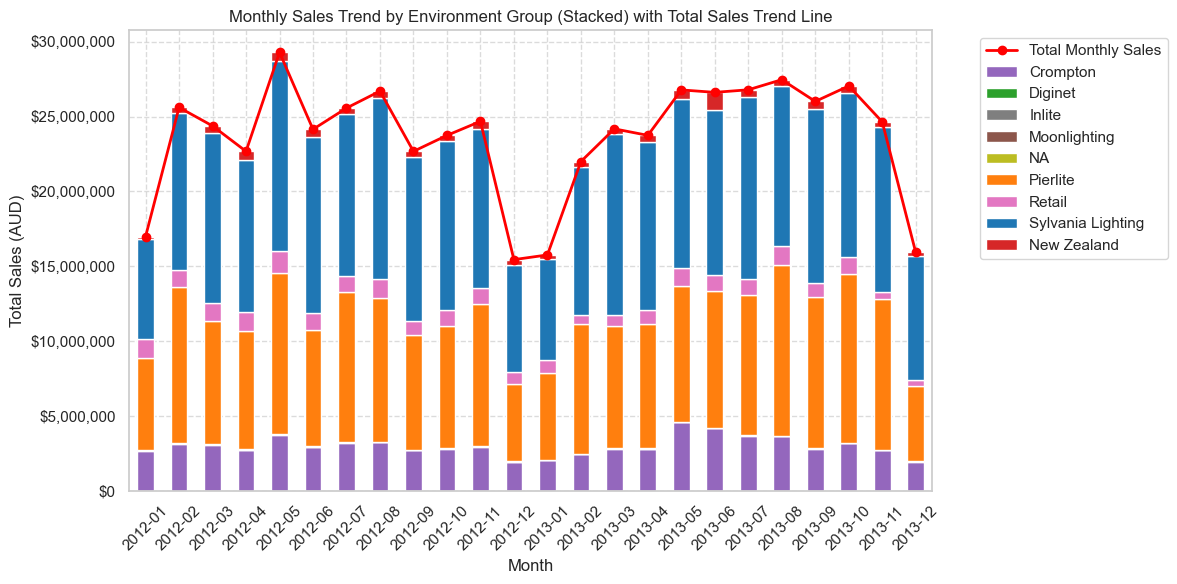

In [66]:

# Pivot the data so each environment group code becomes a column
pivoted_sales = monthly_env_sales.pivot(index='year_month', columns='environment_group_code', values='value_sales_aud')

# Rename columns based on env_labels dictionary
pivoted_sales = pivoted_sales.rename(columns=env_labels)

# Calculate total monthly sales
total_monthly_sales = pivoted_sales.sum(axis=1)

# Create the stacked bar chart
ax = pivoted_sales.plot(kind='bar', stacked=True, figsize=(12, 6), label="", color=[colors[label] for label in pivoted_sales.columns])

# Plot the total monthly sales trend as a line on top of the stacked bars
total_monthly_sales.plot(kind='line', color='red', marker='o', linewidth=2, ax=ax, label='Total Monthly Sales')

# Customize the plot
plt.title('Monthly Sales Trend by Environment Group (Stacked) with Total Sales Trend Line')
plt.xlabel('Month')
plt.ylabel('Total Sales (AUD)')
plt.xticks(rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Format y-axis to show millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

plt.show()


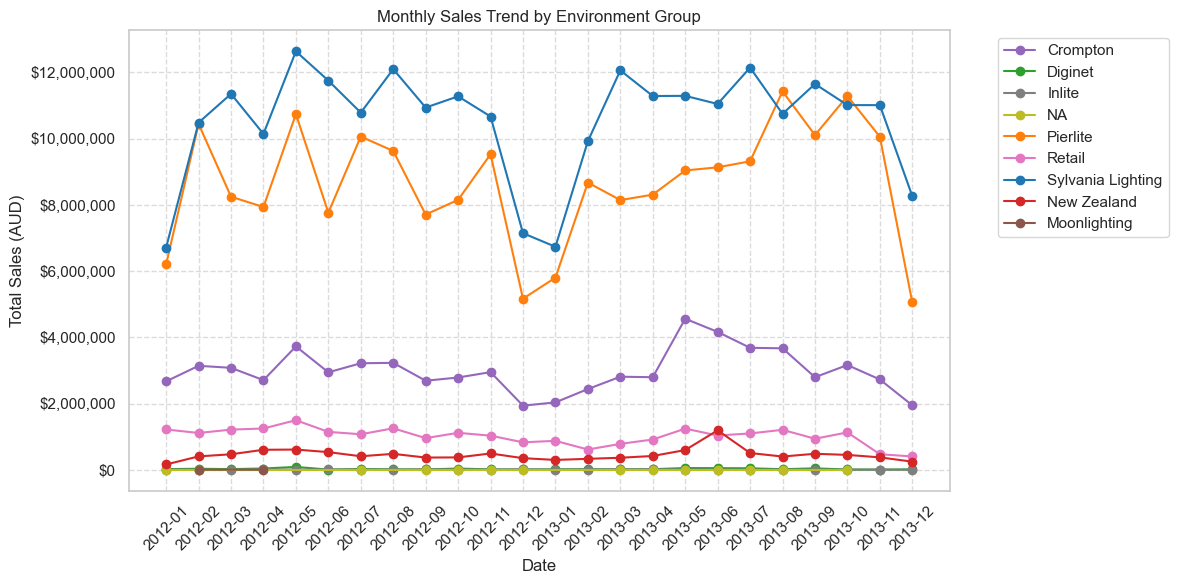

In [67]:
# Create the plot
plt.figure(figsize=(12, 6))

# Plot lines for each environment code with updated labels
for env_code in monthly_env_sales['environment_group_code'].unique():
    env_data = monthly_env_sales[monthly_env_sales['environment_group_code'] == env_code]
    label = env_labels.get(env_code, env_code)  # Use the mapped description or code if not in the dictionary
    plt.plot(env_data['year_month'], env_data['value_sales_aud'], marker='o', label=label, color=colors[label])

# Customize the plot
plt.title('Monthly Sales Trend by Environment Group')
plt.xlabel('Date')
plt.ylabel('Total Sales (AUD)')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Format y-axis to show millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Adjust layout
plt.tight_layout()

plt.show()


### Profitability by Environment Code

C:\Users\reo_c\AppData\Local\Temp\ipykernel_27872\2344409900.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(prof_by_env['env_name'], rotation=45)
C:\Users\reo_c\AppData\Local\Temp\ipykernel_27872\2344409900.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(prof_by_env['env_name'], rotation=30)
posx and posy should be finite values
posx and posy should be finite values


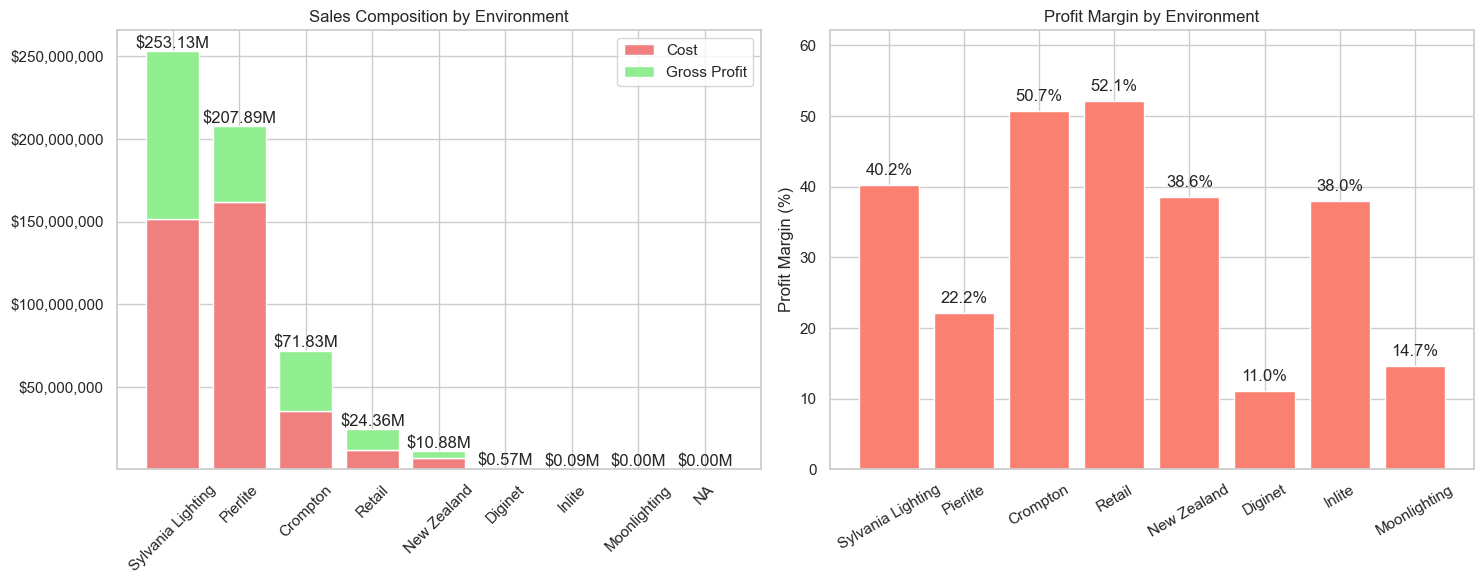

In [68]:
# Calculate profitability metrics by environment code
prof_by_env = nor_order.groupby('environment_group_code').agg({
    'value_sales_aud': ['sum', 'count'],
    'value_cost_aud': 'sum',
    'value_quantity': 'sum',
    'customer_code': 'nunique'
}).reset_index()

# Flatten column names
prof_by_env.columns = ['env_code', 'total_sales', 'order_count', 'total_cost', 'total_quantity', 'unique_customers']

# Calculate additional metrics
prof_by_env['gross_profit'] = prof_by_env['total_sales'] - prof_by_env['total_cost']
prof_by_env['profit_margin'] = (prof_by_env['gross_profit'] / prof_by_env['total_sales']) * 100
prof_by_env['avg_order_value'] = prof_by_env['total_sales'] / prof_by_env['order_count']
prof_by_env['revenue_per_customer'] = prof_by_env['total_sales'] / prof_by_env['unique_customers']

# Map environment codes to labels
prof_by_env['env_name'] = prof_by_env['env_code'].map(env_labels)

# Sort by total sales
prof_by_env = prof_by_env.sort_values('total_sales', ascending=False)

# Create visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Stacked Bar Chart for Sales Composition
cost_data = prof_by_env['total_cost']
profit_data = prof_by_env['gross_profit']

# Create stacked bars
ax1.bar(prof_by_env['env_name'], cost_data, label='Cost', color='lightcoral')
ax1.bar(prof_by_env['env_name'], profit_data, bottom=cost_data, label='Gross Profit', color='lightgreen')
ax1.set_title('Sales Composition by Environment')
ax1.set_xticklabels(prof_by_env['env_name'], rotation=45)
ax1.legend()
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add total sales value labels on top of each bar
for i, (cost, profit) in enumerate(zip(cost_data, profit_data)):
    total = cost + profit
    ax1.text(i, total, f'${total/1000000:,.2f}M', ha='center', va='bottom')

# 2. Profit Margin by Environment
ax2.bar(prof_by_env['env_name'], prof_by_env['profit_margin'], color='salmon')
ax2.set_title('Profit Margin by Environment')
ax2.set_xticklabels(prof_by_env['env_name'], rotation=30)
ax2.set_ylabel('Profit Margin (%)')
ax2.set_ylim(0, max(prof_by_env['profit_margin'])+10)
# Add data labels for Profit Margin
for i, rate in enumerate(prof_by_env['profit_margin']):
    ax2.text(i, rate + 1, f"{rate:.1f}%", ha='center', va='bottom')


plt.tight_layout()
plt.show()

## Section 3: Test Sub Sample Differences

In [69]:
# create new df for section 3
df = combined.copy()

### Question 1: Differences in Value Sales Between Two Customer District Codes

#### Step 1: Define Null Hypothesis and Alternative Hypothesis

Null Hypothesis (H0): There is no significant difference in sales value between two districts

Alternative Hypothesis (H1): There is a significant difference in sales value between two districts.

#### Step 2: Select Two District
Select the customer district codes 720 (Intercompany Sales) and 200 (Sydney), as both have the highest value sales.

In [70]:
dc_sales = df.groupby('customer_district_code')['value_sales_aud'].sum().reset_index()
dc_sales.nlargest(3,'value_sales_aud')

,customer_district_code,value_sales_aud
16,720,161247745.8170
1,200,137821809.1200
3,300,128639666.8500


#### Step 3: Filter Data

In [71]:
from scipy.stats import ttest_ind

district_720 = df[df['customer_district_code'] == '720']['value_sales_aud'].dropna()
district_200 = df[df['customer_district_code'] == '200']['value_sales_aud'].dropna()

#### Step 4: Check Assumptions before performing t-test
- Independence: Transaction are likely to be independent since they came from different customers/orders.
- Normality: Assume that the data for each district approximately normal due to a large sample size.
- Variances: Since we'll set equal_var = False in function.

#### Step 5: Perform Two-Sample T-test

#### Step 6: Result
t-statistc = 74.33
p-value = 0.00

With a p-value < 0.05, there is a significant difference between the average sales of district 720 and district 200.

In [72]:
t_stat, p_value = ttest_ind(district_720, district_200, equal_var=False)

t_stat, p_value

(74.3299966060193, 0.0)

### Question 2: Differences in Sales Value Between Product Categories

#### Step 1: Define Hypothesis
Null Hypothesis (H0): There is no significant difference in average sales value between two product categories.

Alternative Hypothesis (H1): There is a significant difference in average sales value between two product categories.

#### Step 2: Select Two Product Categories

In [73]:
df['business_area_name'].value_counts()

business_area_name
Lamps                            808704
Surface                          399370
Components                       199690
Other                            185722
Downlight                        101658
Flood                             90766
Track & Linear Systems            65975
Stand Alone Emergency             27683
Urban Amenity                     26766
Roadway                           19210
Highbay/Lowbay                    17551
Pendant                            8841
Lighting Control                   6668
Trade/Retail - Interior            5479
Emergency                          2378
Architectural - Interior           1177
Trade/Retail - Exterior             674
Industrial                          497
Commercial                          405
Inlite Architectural Interior       226
Architectural - Exterior            180
Inlite Architectural Exterior        99
Name: count, dtype: int64

In [74]:
category_sales = df.groupby('business_area_name')['value_sales_aud'].sum().reset_index()
category_sales.nlargest(5, 'value_sales_aud')

,business_area_name,value_sales_aud
17,Surface,171304908.2065
11,Lamps,98097792.3614
18,Track & Linear Systems,86958397.8115
15,Roadway,79362690.1288
3,Components,77483877.8662


#### Step 3: Filter Data

In [75]:
df_lamp = df[df['business_area_name'] == 'Lamps']['value_sales_aud'].dropna()
df_surface = df[df['business_area_name'] == 'Surface']['value_sales_aud'].dropna()

#### Step 4: Check Assumptions before performing t-test
- Independence: Transaction are likely to be independent since they came from different customers/orders.
- Normality: Assume that the data for each district approximately normal due to a large sample size.
- Variances: Since we'll set equal_var = False in function.

#### Step 5: Perform the Two-sample T-test

In [76]:
t_stat_q2, p_value_q2 = ttest_ind(df_lamp, df_surface, equal_var=False)

t_stat_q2, p_value_q2

(-91.10696350033014, 0.0)

#### Step 6: Result
t-statistc = -91.11
p-value = 0.00

With a p-value < 0.05, there is a significant difference between the average sales of the two product categories: lamps and surfaces.

## Section 6: Higher Likelihood of Losing Customers  

### Churn analysis based on transaction patterns

In this section, we analyze customer churn patterns based on various transaction behaviors and characteristics. The analysis examines five key dimensions: order frequency, revenue segments, business area engagement, order value patterns, and purchase recency. For each dimension, we calculate the proportion of customers who churned versus those who were retained to identify patterns that may indicate a higher likelihood of customer loss. This helps understand which customer segments are more vulnerable to churn and potentially require more attention for retention efforts. The analysis includes creating customer segments based on these metrics and comparing their respective churn rates to uncover any significant relationships between transaction patterns and customer retention.



In [77]:
# 1. Order Frequency Analysis
freq_churn = retention_df.groupby('order_segment')['status'].value_counts(normalize=True).unstack()

# 2. Revenue Analysis 
rev_churn = retention_df.groupby('revenue_segment')['status'].value_counts(normalize=True).unstack()

# 3. Business Area Engagement Analysis
# Calculate average product categories per customer
customer_categories = combined.groupby('customer_code')['business_area_name'].nunique()
retention_df['category_count'] = retention_df['customer_code'].map(customer_categories)
category_churn = retention_df.groupby(pd.qcut(retention_df['category_count'], 4))['status'].value_counts(normalize=True).unstack()

# 4. Order Value Analysis
retention_df['avg_order_value_change'] = ((retention_df['avg_order_value_2013'] - retention_df['avg_order_value_2012']) 
                                        / retention_df['avg_order_value_2012'] * 100)
value_churn = retention_df.groupby(pd.qcut(retention_df['avg_order_value_2012'], 4))['status'].value_counts(normalize=True).unstack()

# 5. Purchase Recency Analysis
retention_df['last_purchase_gap'] = (pd.to_datetime('2012-12-31') - pd.to_datetime(retention_df['last_purchase_2012'])).dt.days
recency_churn = retention_df.groupby(pd.qcut(retention_df['last_purchase_gap'], 4))['status'].value_counts(normalize=True).unstack()


C:\Users\reo_c\AppData\Local\Temp\ipykernel_27872\3902888166.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_churn = retention_df.groupby('order_segment')['status'].value_counts(normalize=True).unstack()
C:\Users\reo_c\AppData\Local\Temp\ipykernel_27872\3902888166.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rev_churn = retention_df.groupby('revenue_segment')['status'].value_counts(normalize=True).unstack()
C:\Users\reo_c\AppData\Local\Temp\ipykernel_27872\3902888166.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pas

C:\Users\reo_c\AppData\Local\Temp\ipykernel_27872\612575087.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=freq_churn['Lost'].sort_values().index, y=freq_churn['Lost'].sort_values().values, palette=palette)
C:\Users\reo_c\AppData\Local\Temp\ipykernel_27872\612575087.py:17: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax1 = sns.barplot(x=freq_churn['Lost'].sort_values().index, y=freq_churn['Lost'].sort_values().values, palette=palette)
C:\Users\reo_c\AppData\Local\Temp\ipykernel_27872\612575087.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=rev_churn['Lost'].sort_values().index, y

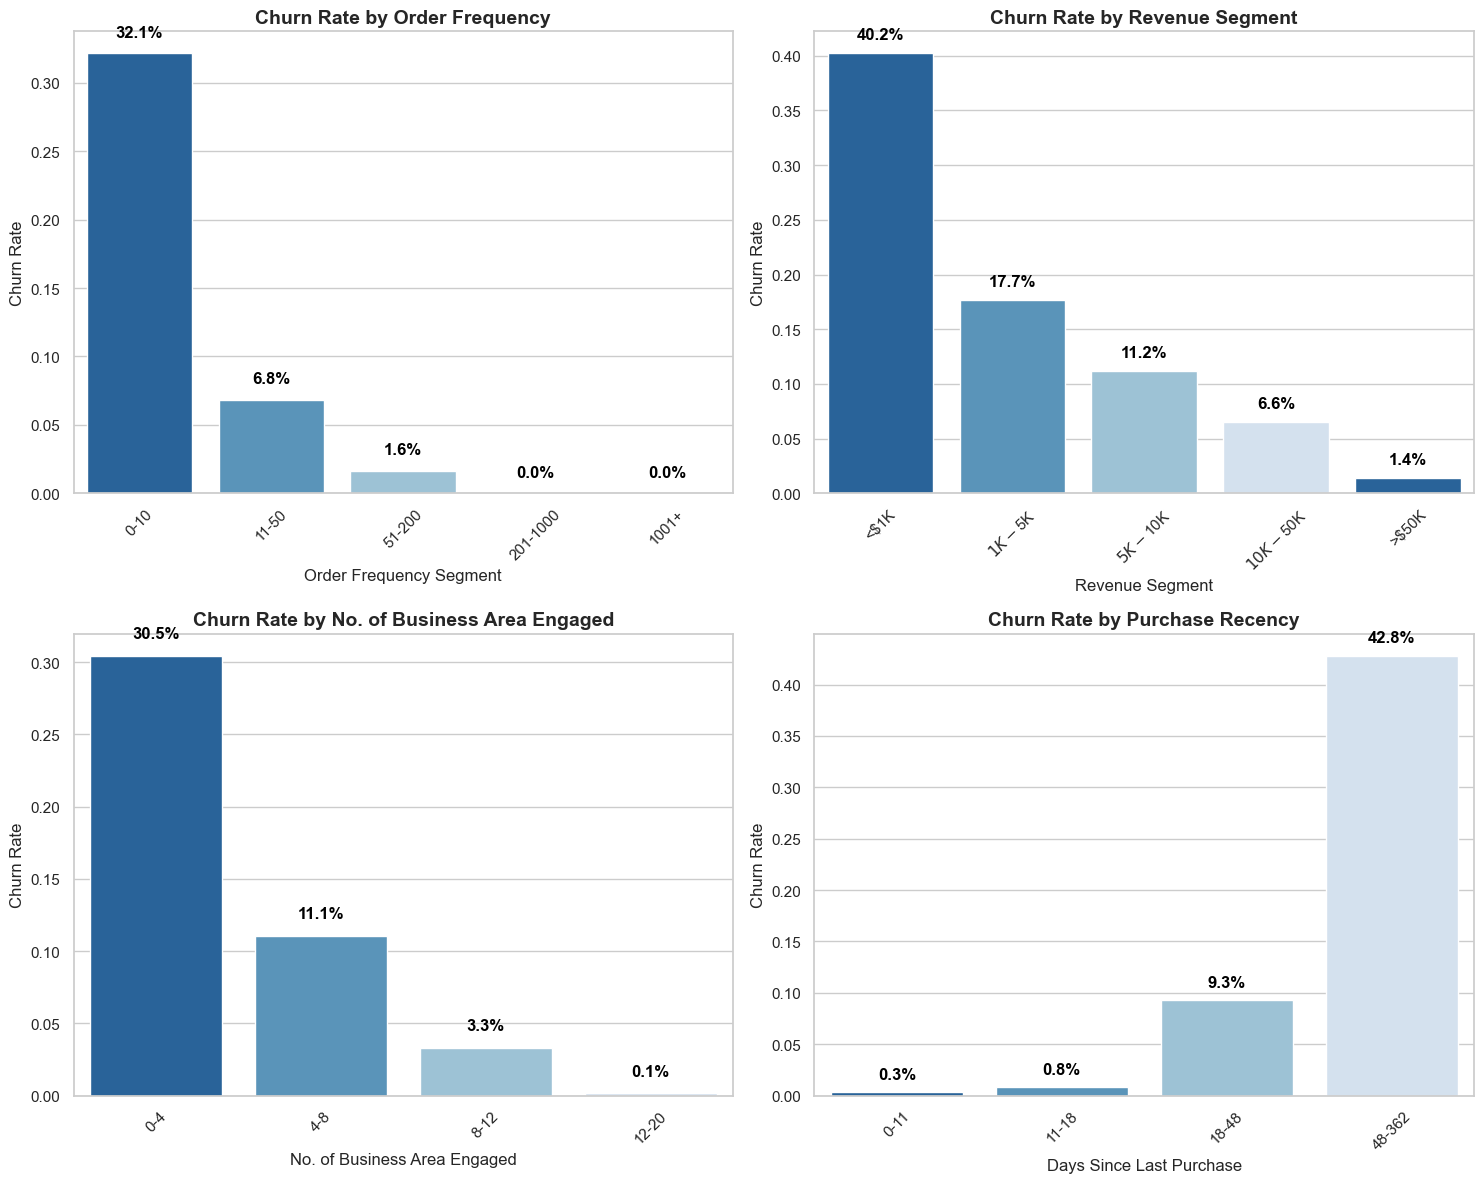

In [78]:
# Set the Seaborn style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("Blues_r", 4)

# Visualize key findings with improved aesthetics
plt.figure(figsize=(15, 12))

# Function to add data labels
def add_data_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 0.01, f"{height * 100:.1f}%", 
                ha="center", va="bottom", fontsize=12, color="black", weight="bold")

# Plot 1: Order Frequency vs Churn
plt.subplot(2, 2, 1)
ax1 = sns.barplot(x=freq_churn['Lost'].sort_values().index, y=freq_churn['Lost'].sort_values().values, palette=palette)
plt.title('Churn Rate by Order Frequency', fontsize=14, weight='bold')
plt.xlabel('Order Frequency Segment', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.xticks(rotation=45)
add_data_labels(ax1)

# Plot 2: Revenue vs Churn
plt.subplot(2, 2, 2)
ax2 = sns.barplot(x=rev_churn['Lost'].sort_values().index, y=rev_churn['Lost'].sort_values().values, palette=palette)
plt.title('Churn Rate by Revenue Segment', fontsize=14, weight='bold')
plt.xlabel('Revenue Segment', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.xticks(rotation=45)
add_data_labels(ax2)

# Plot 3: No. of Business Area Engaged vs Churn
plt.subplot(2, 2, 3)
ax3 = sns.barplot(x=category_churn['Lost'].sort_values().index, y=category_churn['Lost'].sort_values().values, palette=palette)
plt.title('Churn Rate by No. of Business Area Engaged', fontsize=14, weight='bold')
plt.xlabel('No. of Business Area Engaged', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.xticks(rotation=45)
add_data_labels(ax3)

# Adjust x-tick labels to remove decimals for Plot 3
ax3.set_xticklabels([f"{int(interval.left)}-{int(interval.right)}" for interval in category_churn.index.categories])

# Plot 4: Purchase Recency vs Churn
plt.subplot(2, 2, 4)
ax4 = sns.barplot(x=recency_churn['Lost'].sort_values().index, y=recency_churn['Lost'].sort_values().values, palette=palette)
plt.title('Churn Rate by Purchase Recency', fontsize=14, weight='bold')
plt.xlabel('Days Since Last Purchase', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.xticks(rotation=45)
add_data_labels(ax4)

# Adjust x-tick labels to remove decimals for Plot 4
ax4.set_xticklabels([f"{int(interval.left)}-{int(interval.right)}" for interval in recency_churn.index.categories])


# Final adjustments for the layout
plt.tight_layout()
plt.show()

### Churn analysis based on Feature Importance

In this section, we would like to perform a detailed analysis of customer churn using feature importance techniques. The goal is to understand what factors most strongly influence whether a customer will churn or not. We'll prepare our dataset by selecting both numerical features (like sales values, costs, and quantities) and categorical features (such as company_code, business_area_code, etc.) in which required to encode before. Then, we applied logistic regression model to analyze the impact of each feature on churn_in_2013 which logistic regression is particularly suitable for this type of binary outcome analysis.



In [79]:
nor_2012 = nor_order[nor_order['calendar_year'] == 2012]

# Add churn indicator by merging with retention_df
nor_2012 = nor_2012.merge(
    retention_df[['customer_code', 'status']], 
    on='customer_code',
    how='left'
)

# Convert status to churn indicator (1 for Lost, 0 for Retained)
nor_2012['churn_in_2013'] = (nor_2012['status'] == 'Lost').astype(int)

# Drop the status column as we now have the churn indicator
nor_2012 = nor_2012.drop('status', axis=1)

In [80]:
nor_2012.head()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,value_price_adjustment,invoice_number,invoice_date,customer_order_number,order_date,year_month,business_area_name,value_cost_aud,value_sales_aud,churn_in_2013
0,2012-05-09,2012,11,2012,5,9,101,411800601,410,GENIE8WWWBC,...,0,2217887,2012-05-09,2865354,2012-05-09,2012-05,Lamps,178.1976,218.4000,0
1,2012-02-16,2012,8,2012,2,16,101,361000403,300,GENIE8WWWBC,...,0,2185745,2012-02-16,2833515,2012-02-16,2012-02,Lamps,25.4568,38.2800,0
2,2012-05-09,2012,11,2012,5,9,101,361000403,300,GENIE8WWWBC,...,0,2217807,2012-05-09,2864857,2012-05-08,2012-05,Lamps,25.4568,40.2000,0
3,2012-05-04,2012,11,2012,5,4,101,361000410,300,GENIE8WWWBC,...,0,2216019,2012-05-04,2863367,2012-05-03,2012-05,Lamps,12.7284,20.1000,0
4,2012-06-26,2012,12,2012,6,26,101,361000410,300,GENIE8WWWBC,...,0,2238742,2012-06-26,2885718,2012-06-26,2012-06,Lamps,12.7284,20.1000,0


#### Encoding the categorical columns
- Using one-hot encoding

In [81]:
# Select relevant numerical and categorical columns from nor_2012
selected_columns = [
    # Identifier
    'customer_code',
    'customer_order_number',

    # Numerical columns
    'value_sales_aud',
    'value_cost_aud',
    'value_quantity',

    # Categorical columns
    'company_code',
    'customer_district_code',
    'business_area_name',
    'commission_group_code',
    'bonus_group_code',
    'environment_group_code',
    'light_source', 
    'abc_class_code',
    'abc_class_volume',
    'business_chain_l1_code',

    # Target variable
    'churn_in_2013'
]

# Create a copy of nor_2012 with selected columns (without modifying selected_columns)
df_analysis = nor_2012[selected_columns].copy()

# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(
    df_analysis,
    columns=[
        'company_code', 
        'customer_district_code', 
        'business_area_name', 
        'commission_group_code',
        'bonus_group_code', 
        'environment_group_code', 
        'light_source', 
        'abc_class_code',
        'abc_class_volume', 
        'business_chain_l1_code'
    ]
)

# Ensure all one-hot encoded columns are of integer type (0 or 1)
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.columns if col not in ['churn_in_2013', 'customer_code', 'customer_order_number']})

# Drop identifier columns
df_encoded = df_encoded.drop(columns=['customer_code', 'customer_order_number'])


#### Execute Logistic Regression to identify the feature importance on churn_in_2013
- apply class_weight='balanced' to ensure the dataset is not highly skewed
- evaluate the accuracy of churn prediction

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Assuming df_encoded is your preprocessed DataFrame with binary columns
# and 'churn_in_2013' as the target variable

# Step 1: Separate the target variable and features
X = df_encoded.drop(columns=['churn_in_2013'])
y = df_encoded['churn_in_2013']

# Step 2: Check target variable to ensure it's binary
print("Unique values in target variable 'churn_in_2013':", y.unique())

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit Logistic Regression model with L2 regularization
# Using liblinear solver which is well-suited for small to medium-sized datasets
log_reg = LogisticRegression(penalty='l2', solver='liblinear', class_weight='balanced')
log_reg.fit(X_train, y_train)

# Step 5: Display coefficients
# We can get the coefficient values for feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})
print(coefficients.sort_values(by='Coefficient', ascending=False))

# Step 6: Predict and Evaluate the Model
# Predict on the test set
y_pred = log_reg.predict(X_test)

# Generate evaluation metrics
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display top positive and negative impact features on churn
print("\nTop 10 Features Positively Impacting Churn:")
print(coefficients.sort_values(by='Coefficient', ascending=False).head(10))

print("\nTop 10 Features Negatively Impacting Churn:")
print(coefficients.sort_values(by='Coefficient', ascending=True).head(10))



Unique values in target variable 'churn_in_2013': [0 1]
                           Feature  Coefficient
94      business_chain_l1_code_REP       6.5476
98    business_chain_l1_code_Z3200       5.3149
107   business_chain_l1_code_Z8100       3.6268
33   business_area_name_Industrial       3.3645
9                 company_code_950       3.0842
..                             ...          ...
99    business_chain_l1_code_Z3500      -3.5976
106   business_chain_l1_code_Z7500      -4.0222
11      customer_district_code_210      -5.9492
100   business_chain_l1_code_Z4000      -7.3689
85      business_chain_l1_code_BPS      -8.1355

[120 rows x 2 columns]

Confusion Matrix:
 [[115532  50500]
 [   350   1938]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.82    166032
           1       0.04      0.85      0.07      2288

    accuracy                           0.70    168320
   macro avg       0.52      0.77      0.45   

The logistic regression model achieved an overall accuracy of 70% in predicting customer churn. While the model shows strong recall (85%) in identifying customers at risk of churning, its precision is quite low at 4%. This indicates that:

1. The model is good at catching most customers who will actually churn (high recall of 85%)
2. However, it generates many false positives - incorrectly flagging loyal customers as likely to churn (low precision of 4%)
3. This suggests the model is somewhat conservative, preferring to flag more customers as potential churners rather than miss actual churners

This tradeoff between recall and precision means the model could be useful for early warning detection, but would need to be combined with other factors when making business decisions to avoid unnecessarily allocating resources to customers who are actually likely to stay.

#### Plotting the coeffcients of the features which highly impacted on churn_in_2013
- Positive coefficient: High likely to churn features 
- Negative coefficient: less likyly to churn features

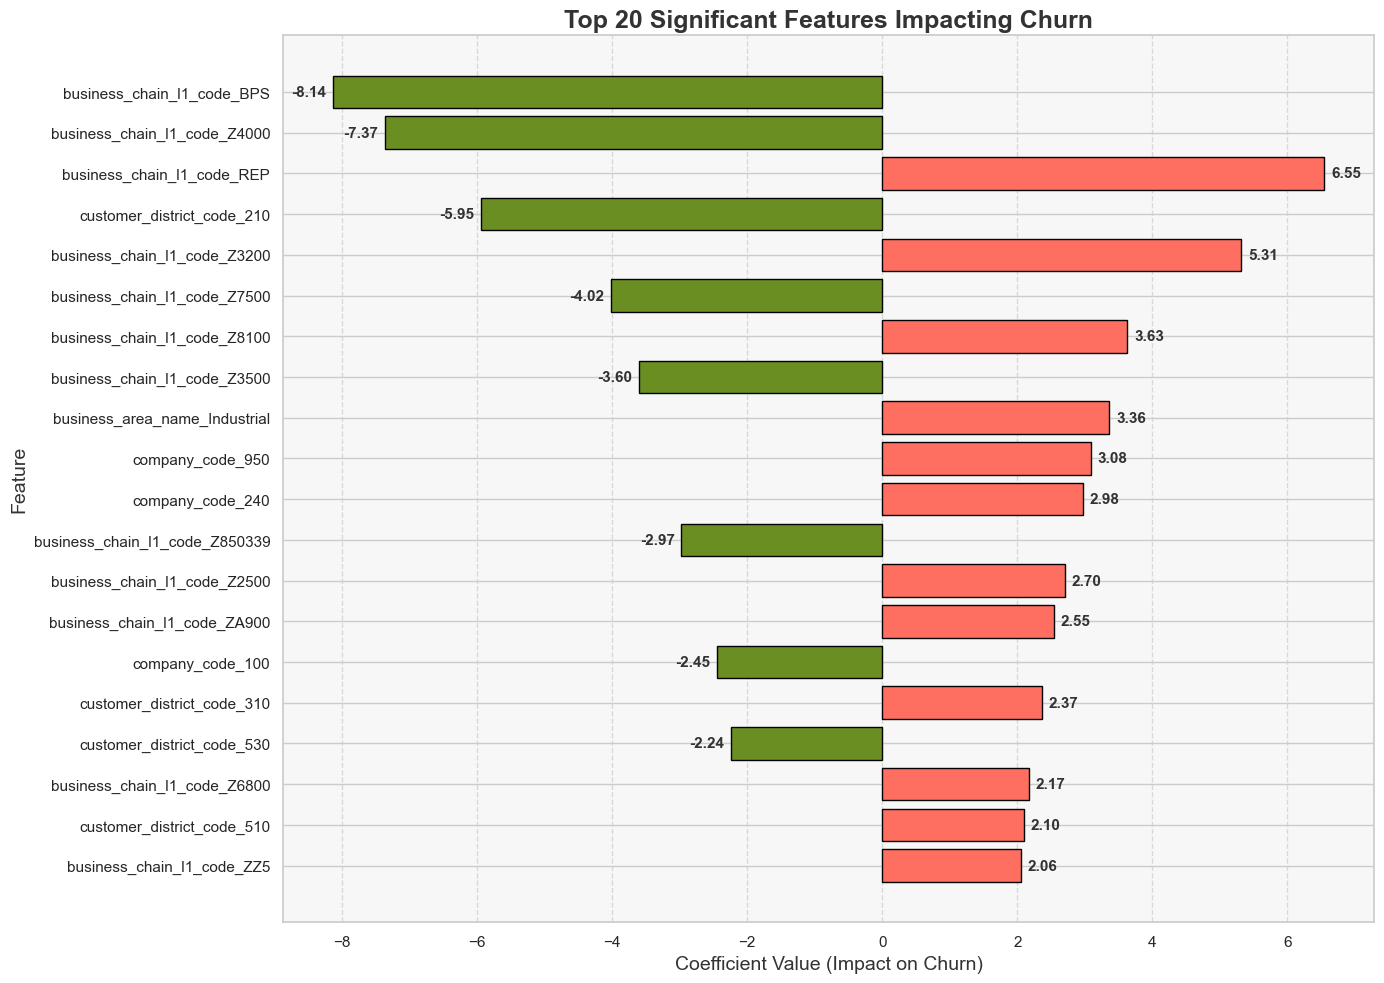

In [83]:
# Sort the coefficients by their absolute values to get the top 20 significant features
top_20_features = coefficients.reindex(coefficients['Coefficient'].abs().sort_values(ascending=False).index).head(20)

# Set a style for the plot
sns.set(style="whitegrid")

# Define a color palette
colors = ['#FF6F61' if coef > 0 else '#6B8E23' for coef in top_20_features['Coefficient']]

# Plot
plt.figure(figsize=(14, 10))
bars = plt.barh(top_20_features['Feature'], top_20_features['Coefficient'], color=colors, edgecolor='black')
plt.title('Top 20 Significant Features Impacting Churn', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Coefficient Value (Impact on Churn)', fontsize=14, color='#333333')
plt.ylabel('Feature', fontsize=14, color='#333333')
plt.gca().invert_yaxis()  # Invert y-axis for readability (largest on top)

# Add grid lines for x-axis only
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels with a slight offset for better readability
for bar, coef in zip(bars, top_20_features['Coefficient']):
    plt.text(bar.get_width() + 0.1 if coef > 0 else bar.get_width() - 0.1, 
             bar.get_y() + bar.get_height()/2, 
             f"{coef:.2f}", 
             va='center', 
             ha='left' if coef > 0 else 'right', 
             fontsize=11, 
             fontweight='bold', 
             color='#333333')

# Add a subtle background color
plt.gca().set_facecolor('#F7F7F7')

# Tight layout for better spacing
plt.tight_layout()
plt.show()

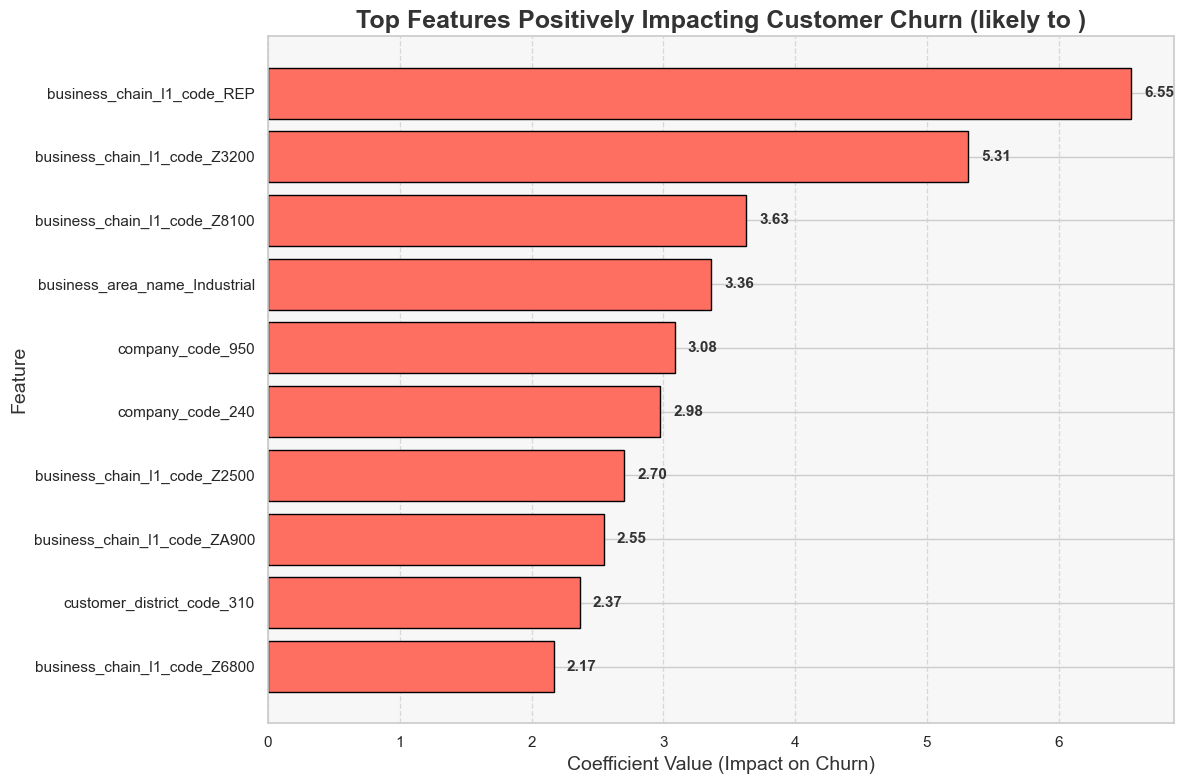

In [84]:
# Filter for features with positive coefficients (those that increase the likelihood of churn)
high_risk_features = coefficients[coefficients['Coefficient'] > 0].sort_values(by='Coefficient', ascending=False).head(10)

# Set a style for the plot
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(high_risk_features['Feature'], high_risk_features['Coefficient'], color='#FF6F61', edgecolor='black')
plt.title('Top Features Positively Impacting Customer Churn (likely to )', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Coefficient Value (Impact on Churn)', fontsize=14, color='#333333')
plt.ylabel('Feature', fontsize=14, color='#333333')
plt.gca().invert_yaxis()  # Invert y-axis for readability

# Add grid lines for x-axis only
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels for each bar
for bar, coef in zip(bars, high_risk_features['Coefficient']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f"{coef:.2f}", va='center', ha='left', fontsize=11, fontweight='bold', color='#333333')

# Add a subtle background color
plt.gca().set_facecolor('#F7F7F7')

# Tight layout for better spacing
plt.tight_layout()
plt.show()